<a href="https://colab.research.google.com/github/estebanoli8/secop_valle_mujer/blob/main/no_supervisado_secop_mujer_valle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agrupamiento de Contratos (Clustering): Utilizar algoritmos de clustering (como K-Means, DBSCAN o Hierarchical Clustering) para identificar segmentos naturales o grupos de contratos que comparten características similares. Esto podría revelar patrones ocultos en el tipo de contratos, entidades involucradas, objetos contractuales o modalidades de selección, sin necesidad de etiquetas previas. El objetivo sería agrupar contratos con 'objeto_a_contratar' e 'objeto_del_proceso' similares, valores de contrato en ciertos rangos, o que involucran a las mismas entidades/contratistas


In [ ]:
# --- Cargar DataFrame desde Google Drive ---
import pandas as pd
print("--- Cargando DataFrame desde Google Drive ---")

# Montar Google Drive
print("  → Montando Google Drive...")
from google.colab import drive
try:
    drive.mount('/content/drive')
    print("     ✅ Google Drive montado correctamente.")
    drive_mounted = True
except Exception as e:
    print(f"     ❌ Error al montar Google Drive: {e}")
    drive_mounted = False

if drive_mounted:
    # Definir la ruta del archivo CSV en Google Drive
    folder_path = '/content/drive/MyDrive/hacemos con ingenieria'
    output_filename = 'contratos_analisis_exploratorio.csv'
    output_filepath = f'{folder_path}/{output_filename}'

    # Verificar si el archivo existe antes de intentar cargarlo
    import os
    if os.path.exists(output_filepath):
        print(f"\n  → Archivo encontrado: '{output_filepath}'. Cargando DataFrame...")
        try:
            df_contracts_loaded = pd.read_csv(output_filepath)
            print("     ✅ DataFrame cargado exitosamente.")
            # Asignar al nombre original del DataFrame si es necesario para análisis posteriores
            df_contracts = df_contracts_loaded
        except Exception as e:
            print(f"     ❌ Error al cargar DataFrame desde Drive: {e}")
            df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío en caso de error
    else:
        print(f"\n  ⚠️ Archivo no encontrado en la ruta: '{output_filepath}'.")
        df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío si el archivo no existe

else:
    print("  ⚠️ Google Drive no se montó correctamente. No se puede cargar el DataFrame.")
    df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío si Drive no está montado

print("\n--- Carga desde Drive Completada ---")

--- Cargando DataFrame desde Google Drive ---
  → Montando Google Drive...
Mounted at /content/drive
     ✅ Google Drive montado correctamente.

  → Archivo encontrado: '/content/drive/MyDrive/hacemos con ingenieria/contratos_analisis_exploratorio.csv'. Cargando DataFrame...
     ✅ DataFrame cargado exitosamente.

--- Carga desde Drive Completada ---


In [ ]:
df_contracts_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   nivel_entidad                     2493 non-null   object
 1   codigo_entidad_en_secop           2493 non-null   int64 
 2   nombre_de_la_entidad              2493 non-null   object
 3   nit_de_la_entidad                 2493 non-null   int64 
 4   departamento_entidad              2493 non-null   object
 5   municipio_entidad                 2493 non-null   object
 6   estado_del_proceso                2493 non-null   object
 7   modalidad_de_contrataci_n         2493 non-null   object
 8   objeto_a_contratar                2493 non-null   object
 9   objeto_del_proceso                2493 non-null   object
 10  tipo_de_contrato                  2493 non-null   object
 11  fecha_de_firma_del_contrato       2493 non-null   object
 12  fecha_inicio_ejecuci

In [ ]:
print("--- Verificando valores únicos de 'tipo_de_contrato' ---")
print(df_contracts_loaded['tipo_de_contrato'].value_counts().to_markdown())
print("--- Verificación completada ---")

--- Verificando valores únicos de 'tipo_de_contrato' ---
| tipo_de_contrato        |   count |
|:------------------------|--------:|
| Prestación de Servicios |    2414 |
| otro                    |      46 |
| Suministros             |      16 |
| otro tipo de contrato   |      11 |
| decreto 092 de 2017     |       4 |
| compraventa             |       1 |
| obra                    |       1 |
--- Verificación completada ---


--- Generando histogramas para 'valor_final' y 'Rango_Valor_Fijo' ---


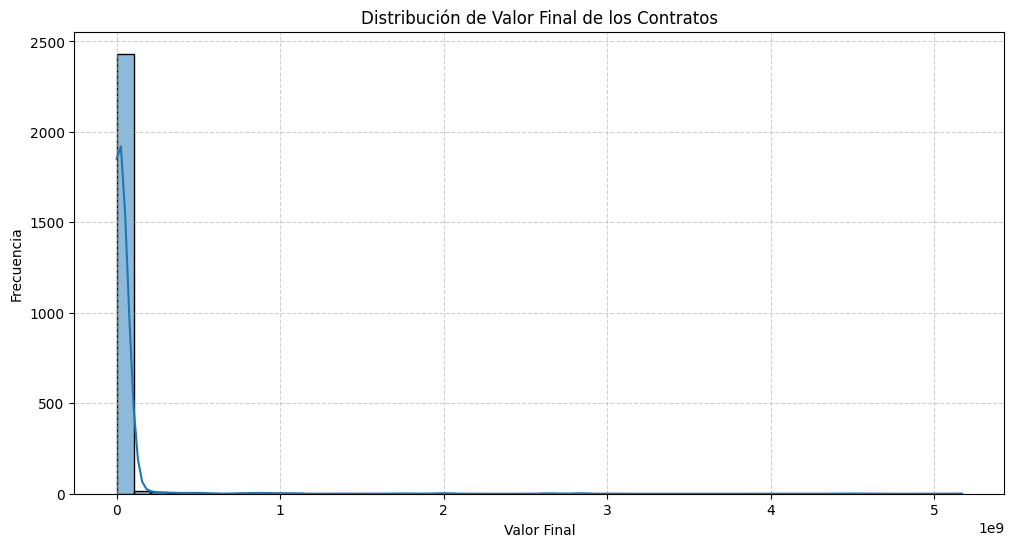

/tmp/ipython-input-3630194444.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_contracts_loaded['Rango_Valor_Fijo'], order=df_contracts_loaded['Rango_Valor_Fijo'].value_counts().index, palette='viridis')


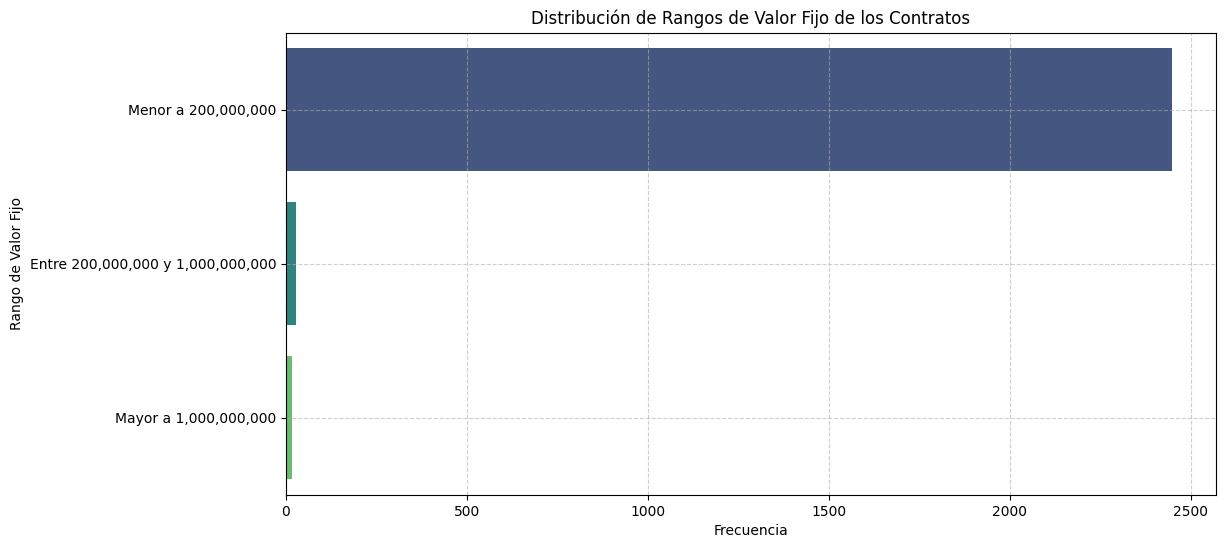

--- Histogramas generados exitosamente ---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Generando histogramas para 'valor_final' y 'Rango_Valor_Fijo' ---")

# Histograma para 'valor_final'
plt.figure(figsize=(12, 6))
sns.histplot(df_contracts_loaded['valor_final'], kde=True, bins=50)
plt.title('Distribución de Valor Final de los Contratos')
plt.xlabel('Valor Final')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Histograma para 'Rango_Valor_Fijo'
plt.figure(figsize=(12, 6))
sns.countplot(y=df_contracts_loaded['Rango_Valor_Fijo'], order=df_contracts_loaded['Rango_Valor_Fijo'].value_counts().index, palette='viridis')
plt.title('Distribución de Rangos de Valor Fijo de los Contratos')
plt.xlabel('Frecuencia')
plt.ylabel('Rango de Valor Fijo')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("--- Histogramas generados exitosamente ---")

--- Visualizando outliers en 'valor_contrato' con un Boxplot ---


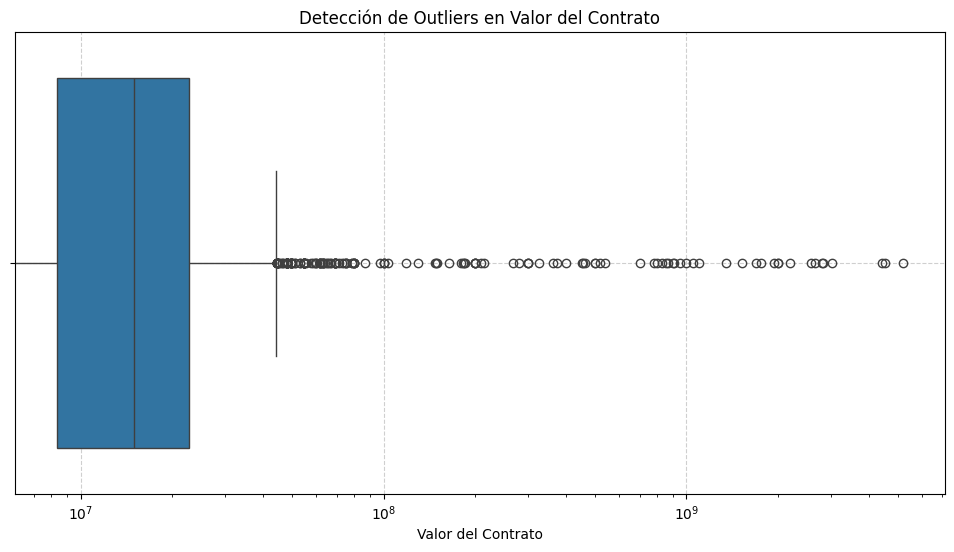

--- Listando los 10 contratos con valores más elevados ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                      |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_social_contratista     | nombre_de_la_entidad                                                             |
|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("--- Visualizando outliers en 'valor_contrato' con un Boxplot ---")

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_contracts['valor_contrato'])
plt.title('Detección de Outliers en Valor del Contrato')
plt.xlabel('Valor del Contrato')
plt.xscale('log') # Usar escala logarítmica si los valores son muy dispersos
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("--- Listando los 10 contratos con valores más elevados ---")

# Ordenar el DataFrame por 'valor_contrato' de forma descendente y seleccionar los 10 primeros
top_10_high_value_contracts = df_contracts.sort_values(by='valor_contrato', ascending=False).head(10)

# Columnas a mostrar para los contratos top
display_cols_outliers = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los 10 contratos con mayor valor
print(top_10_high_value_contracts[display_cols_outliers].to_markdown(index=False))

print("--- Análisis de outliers y contratos elevados completado ---")

In [ ]:
print("--- Listando contratos con 'valor_contrato' entre 200 millones y 1000 millones ---")

# Filtrar el DataFrame por la condición de valor_contrato en millones
filtered_contracts = df_contracts[
    (df_contracts['valor_contrato'] > 200 * 1_000_000) &
    (df_contracts['valor_contrato'] < 1000 * 1_000_000)
]

# Columnas a mostrar para los contratos filtrados
display_cols_filtered = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los contratos filtrados
if not filtered_contracts.empty:
    print(filtered_contracts[display_cols_filtered].to_markdown(index=False))
else:
    print("No se encontraron contratos en el rango de valor_contrato entre 200 millones y 1000 millones.")

print("--- Listado de contratos completado ---")

--- Listando contratos con 'valor_contrato' entre 200 millones y 1000 millones ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
df_contracts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   nivel_entidad                     2493 non-null   object 
 1   codigo_entidad_en_secop           2493 non-null   int64  
 2   nombre_de_la_entidad              2493 non-null   object 
 3   nit_de_la_entidad                 2493 non-null   int64  
 4   departamento_entidad              2493 non-null   object 
 5   municipio_entidad                 2493 non-null   object 
 6   estado_del_proceso                2493 non-null   object 
 7   modalidad_de_contrataci_n         2493 non-null   object 
 8   objeto_a_contratar                2493 non-null   object 
 9   objeto_del_proceso                2493 non-null   object 
 10  tipo_de_contrato                  2493 non-null   object 
 11  fecha_de_firma_del_contrato       2493 non-null   object 
 12  fecha_

In [ ]:
# Asegurarse de que df_contracts esté definido en caso de que el kernel se haya reiniciado o las celdas no se hayan ejecutado en orden.
# La línea 'df_contracts = df_contracts_loaded' ha sido eliminada para evitar NameError ya que df_contracts debería estar globalmente disponible.

print("--- Listando los contratos con los valores más altos en el rango de 0 a 200 millones ---")

# Filtrar el DataFrame para contratos en el rango de 0 a 200 millones
filtered_contracts_200M = df_contracts[
    (df_contracts['valor_contrato'] > 0) &
    (df_contracts['valor_contrato'] <= 200 * 1_000_000)
]

# Ordenar los contratos filtrados por 'valor_contrato' de forma descendente y seleccionar los 10 primeros
top_contracts_200M = filtered_contracts_200M.sort_values(by='valor_contrato', ascending=False).head(10)

# Columnas a mostrar para los contratos top en este rango
display_cols = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los contratos encontrados
if not top_contracts_200M.empty:
    print(top_contracts_200M[display_cols].to_markdown(index=False))
else:
    print("No se encontraron contratos en el rango de valor_contrato entre 0 y 200 millones o la lista está vacía.")

print("--- Listado completado ---")

--- Listando los contratos con los valores más altos en el rango de 0 a 200 millones ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                              |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_social_contratista                              | nombre_de_la_entidad                                                                                   |
|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

vas a crear dos data sets nuevos. df_ps y df_empresas

todos los registros de el data set actual tendrá que ir a uno o a otro de los dos nuevos data sets.
la diferenciación para ponerlos en uno o en otro es: en

--- Generando histograma (countplot) para 'tipo_de_contrato' con valores en barras ---


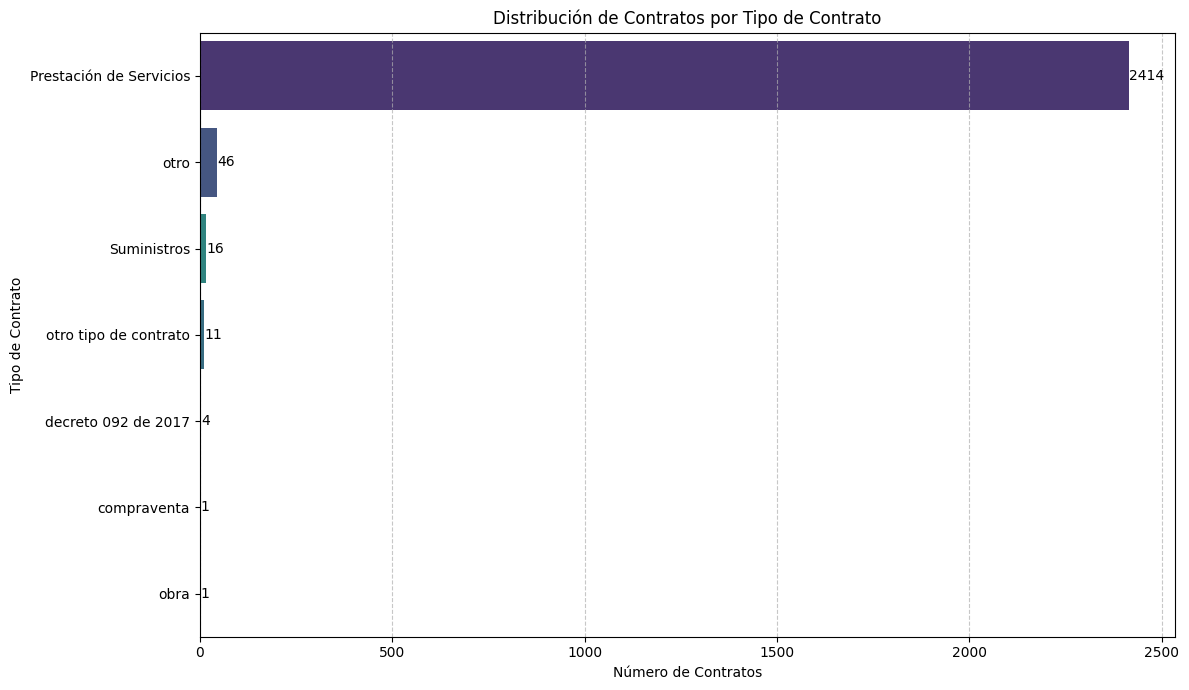

--- Histograma (countplot) generado exitosamente ---

--- Generando histograma para 'valor_contrato' de contratos de 'Prestación de Servicios' (Escala Logarítmica) ---


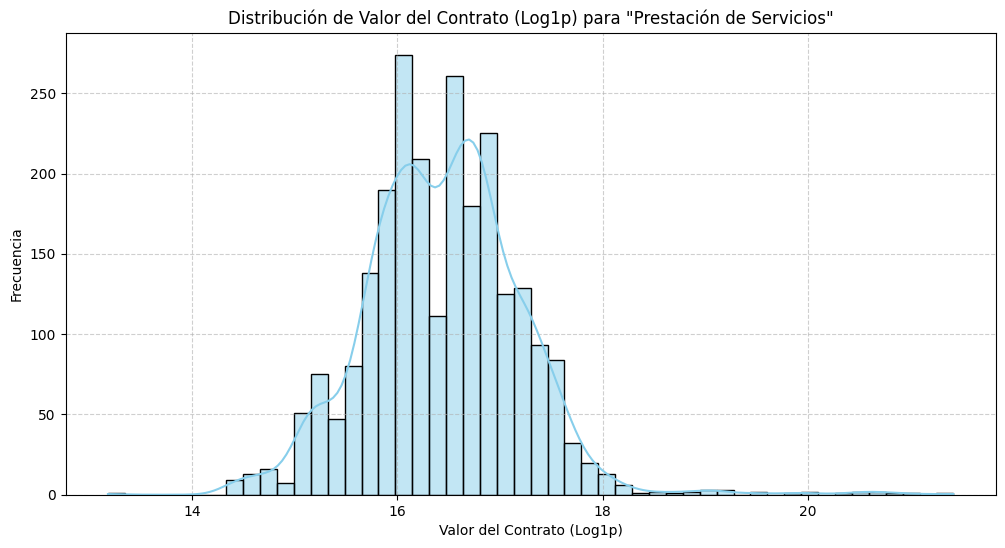


--- Generando histograma para 'valor_contrato' del resto de contratos (Escala Logarítmica) ---


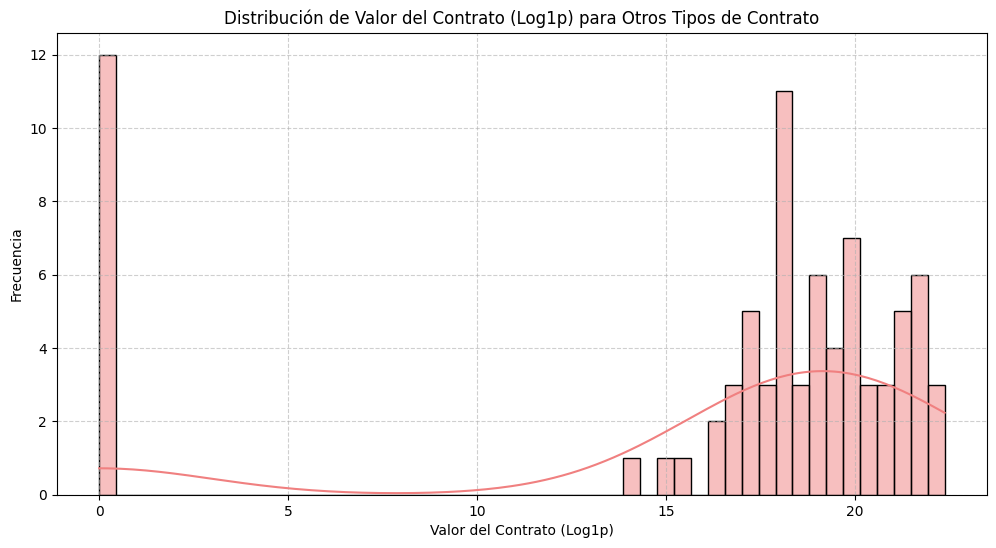


--- Histogramas adicionales generados exitosamente ---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Generando histograma (countplot) para 'tipo_de_contrato' con valores en barras ---")

plt.figure(figsize=(12, 7))
ax = sns.countplot(y=df_contracts_loaded['tipo_de_contrato'], order=df_contracts_loaded['tipo_de_contrato'].value_counts().index, palette='viridis', hue=df_contracts_loaded['tipo_de_contrato'], legend=False)
plt.title('Distribución de Contratos por Tipo de Contrato')
plt.xlabel('Número de Contratos')
plt.ylabel('Tipo de Contrato')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir valores en cada barra para el countplot
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{int(width)}', va='center')

plt.tight_layout()
plt.show()

print("--- Histograma (countplot) generado exitosamente ---")

# --- Nuevos histogramas solicitados con escala logarítmica ---
print("\n--- Generando histograma para 'valor_contrato' de contratos de 'Prestación de Servicios' (Escala Logarítmica) ---")

# Filtrar contratos de 'Prestación de Servicios'
df_ps = df_contracts_loaded[df_contracts_loaded['tipo_de_contrato'] == 'Prestación de Servicios']

if not df_ps.empty:
    # Aplicar transformación logarítmica a los valores
    valor_ps_log = np.log1p(df_ps['valor_contrato'])

    plt.figure(figsize=(12, 6))
    sns.histplot(valor_ps_log, kde=True, bins=50, color='skyblue')
    plt.title('Distribución de Valor del Contrato (Log1p) para "Prestación de Servicios"')
    plt.xlabel('Valor del Contrato (Log1p)')
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
else:
    print("  ⚠️ No se encontraron contratos de 'Prestación de Servicios'.")

print("\n--- Generando histograma para 'valor_contrato' del resto de contratos (Escala Logarítmica) ---")

# Filtrar el resto de contratos (no 'Prestación de Servicios')
df_resto = df_contracts_loaded[df_contracts_loaded['tipo_de_contrato'] != 'Prestación de Servicios']

if not df_resto.empty:
    # Aplicar transformación logarítmica a los valores
    valor_resto_log = np.log1p(df_resto['valor_contrato'])

    plt.figure(figsize=(12, 6))
    sns.histplot(valor_resto_log, kde=True, bins=50, color='lightcoral')
    plt.title('Distribución de Valor del Contrato (Log1p) para Otros Tipos de Contrato')
    plt.xlabel('Valor del Contrato (Log1p)')
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
else:
    print("  ⚠️ No se encontraron otros tipos de contrato.")

print("\n--- Histogramas adicionales generados exitosamente ---")

In [ ]:
print("--- Listando contratos con 'tipo_de_contrato' igual a 'otro' ---")

# Filtrar el DataFrame por la condición tipo_de_contrato == 'otro'
filtered_otro_contracts = df_contracts_loaded[df_contracts_loaded['tipo_de_contrato'] == 'otro']

# Columnas a mostrar para los contratos filtrados
display_cols_otro = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los contratos filtrados
if not filtered_otro_contracts.empty:
    print(filtered_otro_contracts[display_cols_otro].to_markdown(index=False))
else:
    print("No se encontraron contratos con 'tipo_de_contrato' igual a 'otro'.")

print("--- Listado de contratos 'otro' completado ---")

--- Listando contratos con 'tipo_de_contrato' igual a 'otro' ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_social_contratista                                                      | nombre_de_la_entidad                                                                                   |
|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Generando histograma (countplot) para 'tipo_documento_proveedor' ---


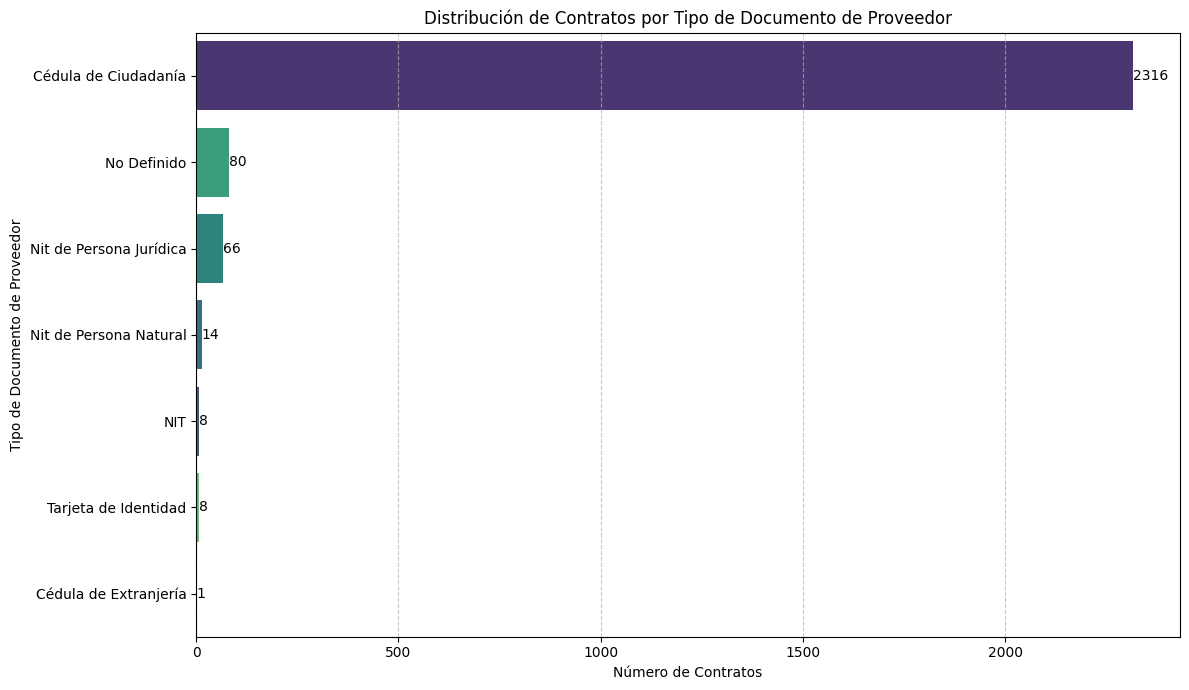

--- Histograma (countplot) generado exitosamente ---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Generando histograma (countplot) para 'tipo_documento_proveedor' ---")

plt.figure(figsize=(12, 7))
ax = sns.countplot(y=df_contracts_loaded['tipo_documento_proveedor'], order=df_contracts_loaded['tipo_documento_proveedor'].value_counts().index, palette='viridis', hue=df_contracts_loaded['tipo_documento_proveedor'], legend=False)
plt.title('Distribución de Contratos por Tipo de Documento de Proveedor')
plt.xlabel('Número de Contratos')
plt.ylabel('Tipo de Documento de Proveedor')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir valores en cada barra
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{int(width)}', va='center')

plt.tight_layout()
plt.show()

print("--- Histograma (countplot) generado exitosamente ---")

In [ ]:
print("--- Verificando valores únicos y conteos de 'tipo_documento_proveedor' ---")
print(df_contracts_loaded['tipo_documento_proveedor'].value_counts().to_markdown())
print("--- Verificación completada ---")

--- Verificando valores únicos y conteos de 'tipo_documento_proveedor' ---
| tipo_documento_proveedor   |   count |
|:---------------------------|--------:|
| Cédula de Ciudadanía       |    2316 |
| No Definido                |      80 |
| Nit de Persona Jurídica    |      66 |
| Nit de Persona Natural     |      14 |
| NIT                        |       8 |
| Tarjeta de Identidad       |       8 |
| Cédula de Extranjería      |       1 |
--- Verificación completada ---


In [ ]:
print("--- Listando 100 contratos aleatorios con 'tipo_documento_proveedor' igual a 'Cédula de Ciudadanía' ---")

# Filtrar el DataFrame por la condición tipo_documento_proveedor == 'Cédula de Ciudadanía'
filtered_cc_contracts = df_contracts_loaded[df_contracts_loaded['tipo_documento_proveedor'] == 'Cédula de Ciudadanía']

# Seleccionar 100 contratos aleatorios si hay suficientes, de lo contrario, seleccionar todos
if len(filtered_cc_contracts) >= 100:
    random_cc_contracts = filtered_cc_contracts.sample(n=100, random_state=42) # Usar random_state para reproducibilidad
else:
    random_cc_contracts = filtered_cc_contracts

# Columnas a mostrar para los contratos filtrados
display_cols = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los contratos filtrados
if not random_cc_contracts.empty:
    print(random_cc_contracts[display_cols].to_markdown(index=False))
else:
    print("No se encontraron contratos con 'tipo_documento_proveedor' igual a 'Cédula de Ciudadanía' o la lista está vacía.")

print("--- Listado de 100 contratos aleatorios 'Cédula de Ciudadanía' completado ---")

--- Listando 100 contratos aleatorios con 'tipo_documento_proveedor' igual a 'Cédula de Ciudadanía' ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_social_contratista          | nombre_de_la_entidad                                                             |
|:-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
print("--- Listando contratos con 'tipo_documento_proveedor' igual a 'No Definido' ---")

# Filtrar el DataFrame por la condición tipo_documento_proveedor == 'No Definido'
filtered_no_definido_contracts = df_contracts_loaded[df_contracts_loaded['tipo_documento_proveedor'] == 'No Definido']

# Columnas a mostrar para los contratos filtrados (utilizando la misma lista de columnas para consistencia)
display_cols_no_definido = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los contratos filtrados
if not filtered_no_definido_contracts.empty:
    print(filtered_no_definido_contracts[display_cols_no_definido].to_markdown(index=False))
else:
    print("No se encontraron contratos con 'tipo_documento_proveedor' igual a 'No Definido'.")

print("--- Listado de contratos 'No Definido' completado ---")

--- Listando contratos con 'tipo_documento_proveedor' igual a 'No Definido' ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_social_contratista                                                      | nombre_de_la_entidad                                                                                   |
|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
print("--- Listando contratos con 'tipo_documento_proveedor' igual a 'Nit de Persona Natural' ---")

# Filtrar el DataFrame por la condición tipo_documento_proveedor == 'Nit de Persona Natural'
filtered_nit_natural_contracts = df_contracts_loaded[df_contracts_loaded['tipo_documento_proveedor'] == 'Nit de Persona Natural']

# Columnas a mostrar para los contratos filtrados
display_cols = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los contratos filtrados
if not filtered_nit_natural_contracts.empty:
    print(filtered_nit_natural_contracts[display_cols].to_markdown(index=False))
else:
    print("No se encontraron contratos con 'tipo_documento_proveedor' igual a 'Nit de Persona Natural'.")

print("--- Listado de contratos 'Nit de Persona Natural' completado ---")

--- Listando contratos con 'tipo_documento_proveedor' igual a 'Nit de Persona Natural' ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_

In [ ]:
print("--- Listando contratos con 'valor_contrato' igual a 0 ---")

# Filtrar el DataFrame por la condición valor_contrato == 0
zero_value_contracts = df_contracts_loaded[df_contracts_loaded['valor_contrato'] == 0]

# Columnas a mostrar para los contratos filtrados
display_cols_zero_value = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los contratos filtrados
if not zero_value_contracts.empty:
    print(zero_value_contracts[display_cols_zero_value].to_markdown(index=False))
else:
    print("No se encontraron contratos con 'valor_contrato' igual a 0.")

print("--- Listado de contratos con valor 0 completado ---")

--- Listando contratos con 'valor_contrato' igual a 0 ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_social_contratista                                                                           | nombre_de_la_entidad                                                             |
|:----------------------------------------------------------

--- Generando gráficos de distribución de 'valor_contrato' por categorías ---


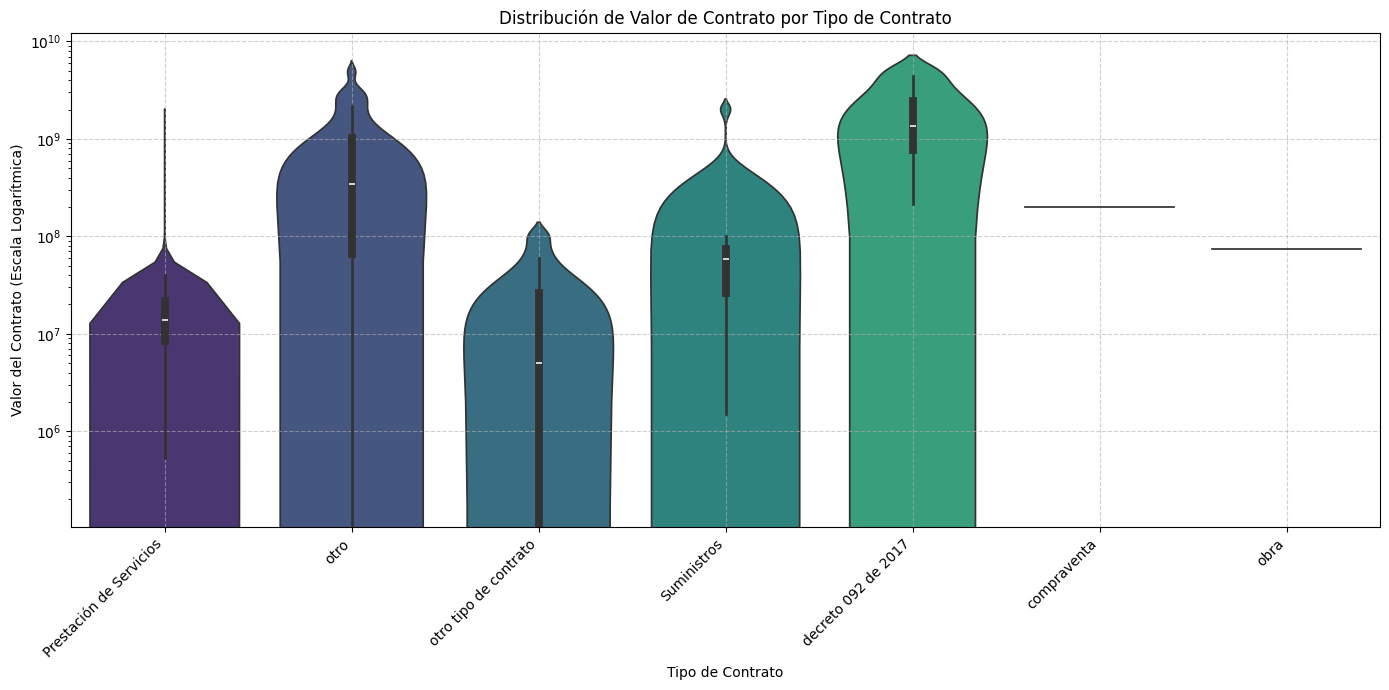

/tmp/ipython-input-1862248768.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


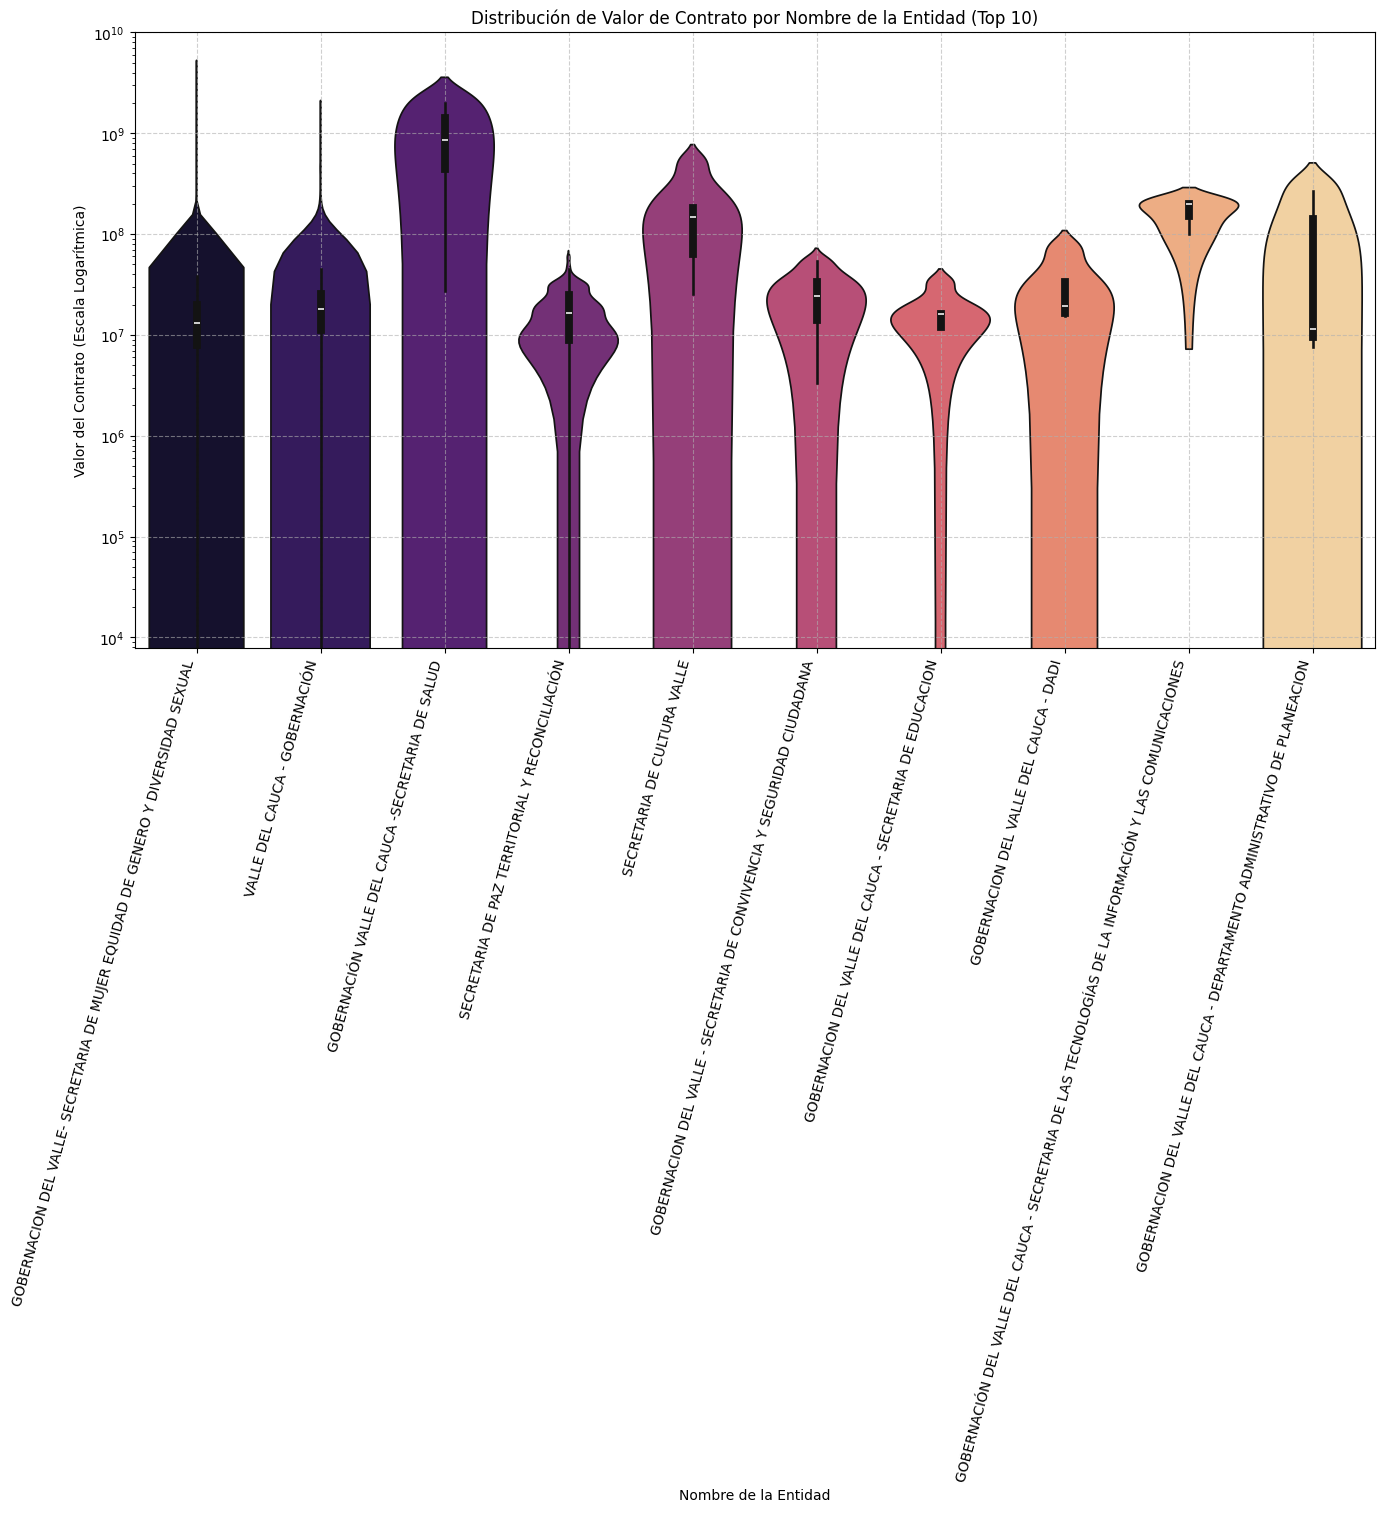

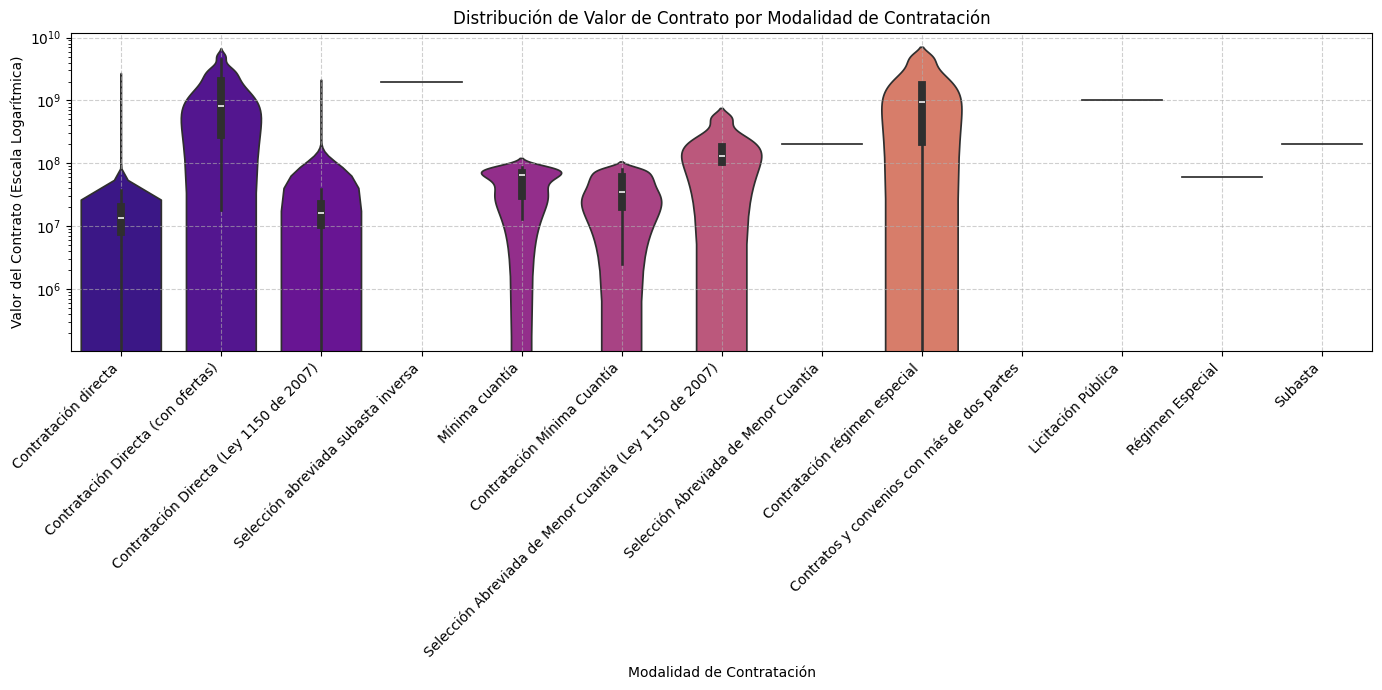

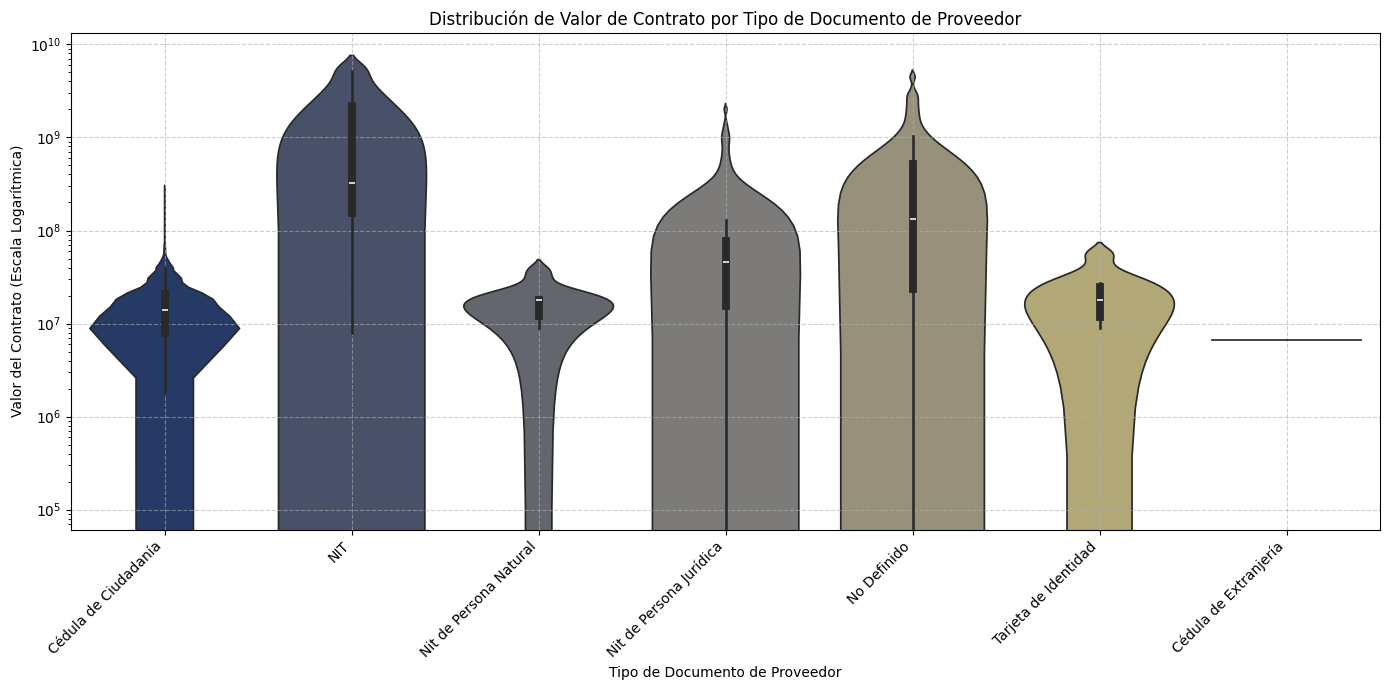

--- Generación de gráficos completada ---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Generando gráficos de distribución de 'valor_contrato' por categorías ---")

# 1. Gráfico: 'tipo_de_contrato' vs 'valor_contrato'
plt.figure(figsize=(14, 7))
sns.violinplot(x='tipo_de_contrato', y='valor_contrato', data=df_contracts_loaded, palette='viridis', hue='tipo_de_contrato', legend=False)
plt.title('Distribución de Valor de Contrato por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Valor del Contrato (Escala Logarítmica)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 2. Gráfico: 'nombre_de_la_entidad' vs 'valor_contrato'
# Para 'nombre_de_la_entidad', puede haber muchas categorías. Se mostrarán los 10 principales para no saturar el gráfico.
top_10_entities = df_contracts_loaded['nombre_de_la_entidad'].value_counts().head(10).index
df_top_entities = df_contracts_loaded[df_contracts_loaded['nombre_de_la_entidad'].isin(top_10_entities)]

plt.figure(figsize=(16, 8))
sns.violinplot(x='nombre_de_la_entidad', y='valor_contrato', data=df_top_entities, palette='magma', hue='nombre_de_la_entidad', legend=False)
plt.title('Distribución de Valor de Contrato por Nombre de la Entidad (Top 10)')
plt.xlabel('Nombre de la Entidad')
plt.ylabel('Valor del Contrato (Escala Logarítmica)')
plt.yscale('log')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3. Gráfico: 'modalidad_de_contrataci_n' vs 'valor_contrato'
plt.figure(figsize=(14, 7))
sns.violinplot(x='modalidad_de_contrataci_n', y='valor_contrato', data=df_contracts_loaded, palette='plasma', hue='modalidad_de_contrataci_n', legend=False)
plt.title('Distribución de Valor de Contrato por Modalidad de Contratación')
plt.xlabel('Modalidad de Contratación')
plt.ylabel('Valor del Contrato (Escala Logarítmica)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 4. Gráfico: 'tipo_documento_proveedor' vs 'valor_contrato'
plt.figure(figsize=(14, 7))
sns.violinplot(x='tipo_documento_proveedor', y='valor_contrato', data=df_contracts_loaded, palette='cividis', hue='tipo_documento_proveedor', legend=False)
plt.title('Distribución de Valor de Contrato por Tipo de Documento de Proveedor')
plt.xlabel('Tipo de Documento de Proveedor')
plt.ylabel('Valor del Contrato (Escala Logarítmica)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("--- Generación de gráficos completada ---")

In [ ]:
print("--- Creando nuevos DataFrames y mostrando su información ---")

# Definir las columnas comunes que se incluirán en los nuevos DataFrames
common_cols = [
    'nombre_de_la_entidad',
    'objeto_a_contratar',
    'objeto_del_proceso',
    'tipo_de_contrato',
    'fecha_de_firma_del_contrato',
    'fecha_inicio_ejecuci_n',
    'fecha_fin_ejecuci_n',
    'valor_contrato',
    'url_contrato',
    'Año_Contrato',
    'nom_raz_social_contratista_corto'
]

# 1. Crear df_cero
print("\n--- Creando df_cero (contratos con valor_contrato = 0) ---")
df_cero = df_contracts_loaded[df_contracts_loaded['valor_contrato'] == 0][common_cols].copy()
print("df_cero.info():")
df_cero.info()

# 2. Crear df_ps (personas naturales y físicas)
print("\n--- Creando df_ps (tipo_documento_proveedor: Cédula de Ciudadanía, Nit de Persona Natural, Tarjeta de Identidad, Cédula de Extranjería) ---")
ps_doc_types = ['Cédula de Ciudadanía', 'Nit de Persona Natural', 'Tarjeta de Identidad', 'Cédula de Extranjería']
df_ps = df_contracts_loaded[df_contracts_loaded['tipo_documento_proveedor'].isin(ps_doc_types)][common_cols].copy()
print("df_ps.info():")
df_ps.info()

# 3. Crear df_empresas (empresas y no definidos)
print("\n--- Creando df_empresas (tipo_documento_proveedor: NIT, No Definido, Nit de Persona Jurídica) ---")
empresas_doc_types = ['NIT', 'No Definido', 'Nit de Persona Jurídica']
df_empresas = df_contracts_loaded[df_contracts_loaded['tipo_documento_proveedor'].isin(empresas_doc_types)][common_cols].copy()
print("df_empresas.info():")
df_empresas.info()

print("\n--- Creación y verificación de DataFrames completada ---")

--- Creando nuevos DataFrames y mostrando su información ---

--- Creando df_cero (contratos con valor_contrato = 0) ---
df_cero.info():
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 179 to 2337
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   nombre_de_la_entidad              12 non-null     object
 1   objeto_a_contratar                12 non-null     object
 2   objeto_del_proceso                12 non-null     object
 3   tipo_de_contrato                  12 non-null     object
 4   fecha_de_firma_del_contrato       12 non-null     object
 5   fecha_inicio_ejecuci_n            12 non-null     object
 6   fecha_fin_ejecuci_n               12 non-null     object
 7   valor_contrato                    12 non-null     int64 
 8   url_contrato                      12 non-null     object
 9   Año_Contrato                      12 non-null     int64 
 10  nom_raz_soci

In [ ]:
import os

print("--- Guardando nuevos DataFrames en Google Drive como CSV ---")

# Definir la ruta base en Google Drive (asumiendo que ya está montado)
# Usaremos la misma ruta donde se cargó el dataframe original para consistencia
base_folder_path = '/content/drive/MyDrive/hacemos con ingenieria'

# Asegurarse de que el directorio existe
if not os.path.exists(base_folder_path):
    print(f"  ⚠️ La carpeta '{base_folder_path}' no existe. Creándola...")
    os.makedirs(base_folder_path)

# Guardar df_cero
output_filepath_cero = os.path.join(base_folder_path, 'df_cero_contratos.csv')
try:
    df_cero.to_csv(output_filepath_cero, index=False)
    print(f"  ✅ df_cero guardado exitosamente en '{output_filepath_cero}'.")
except Exception as e:
    print(f"  ❌ Error al guardar df_cero: {e}")

# Guardar df_ps
output_filepath_ps = os.path.join(base_folder_path, 'df_ps_contratos.csv')
try:
    df_ps.to_csv(output_filepath_ps, index=False)
    print(f"  ✅ df_ps guardado exitosamente en '{output_filepath_ps}'.")
except Exception as e:
    print(f"  ❌ Error al guardar df_ps: {e}")

# Guardar df_empresas
output_filepath_empresas = os.path.join(base_folder_path, 'df_empresas_contratos.csv')
try:
    df_empresas.to_csv(output_filepath_empresas, index=False)
    print(f"  ✅ df_empresas guardado exitosamente en '{output_filepath_empresas}'.")
except Exception as e:
    print(f"  ❌ Error al guardar df_empresas: {e}")

print("--- Guardado de DataFrames completado ---")

--- Guardando nuevos DataFrames en Google Drive como CSV ---
  ✅ df_cero guardado exitosamente en '/content/drive/MyDrive/hacemos con ingenieria/df_cero_contratos.csv'.
  ✅ df_ps guardado exitosamente en '/content/drive/MyDrive/hacemos con ingenieria/df_ps_contratos.csv'.
  ✅ df_empresas guardado exitosamente en '/content/drive/MyDrive/hacemos con ingenieria/df_empresas_contratos.csv'.
--- Guardado de DataFrames completado ---


--- Generando histogramas para 'valor_contrato' de cada nuevo DataFrame ---

--- Análisis de 'valor_contrato' en df_cero ---
  ✅ Todos los contratos en df_cero tienen 'valor_contrato' igual a 0. No se genera histograma.

--- Histograma para 'valor_contrato' en df_ps (Escala Logarítmica) ---


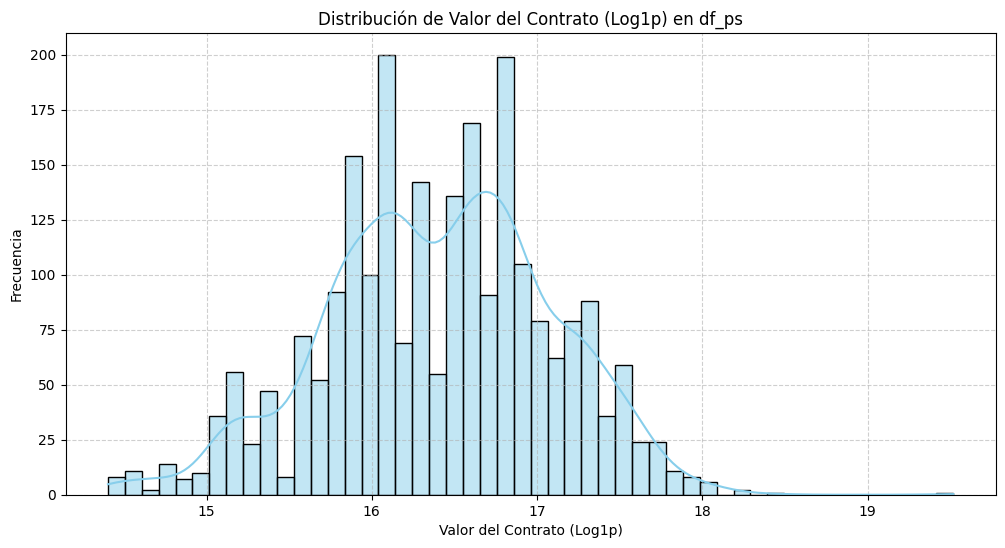


--- Histograma para 'valor_contrato' en df_ps (Escala Lineal) ---


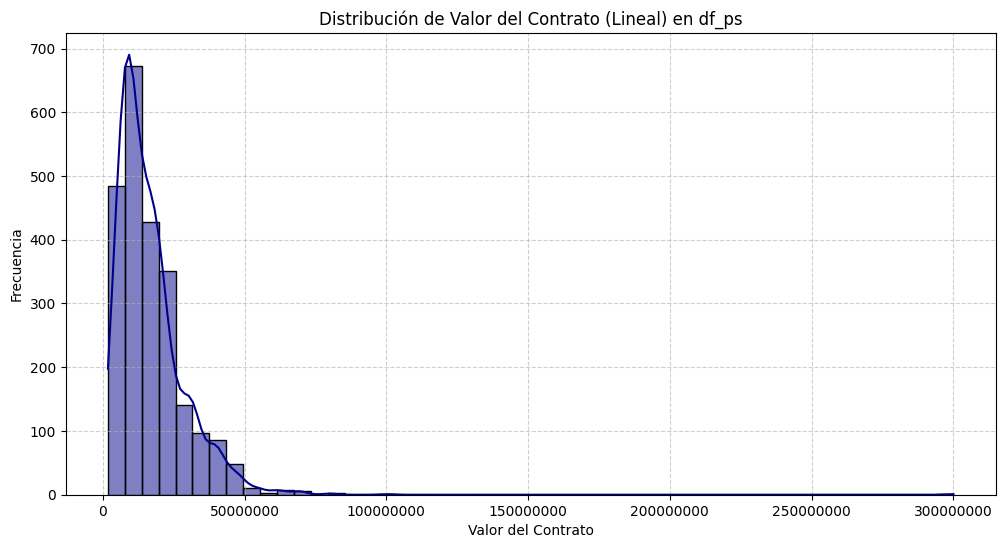


--- Histograma para 'valor_contrato' en df_empresas (Escala Logarítmica) ---


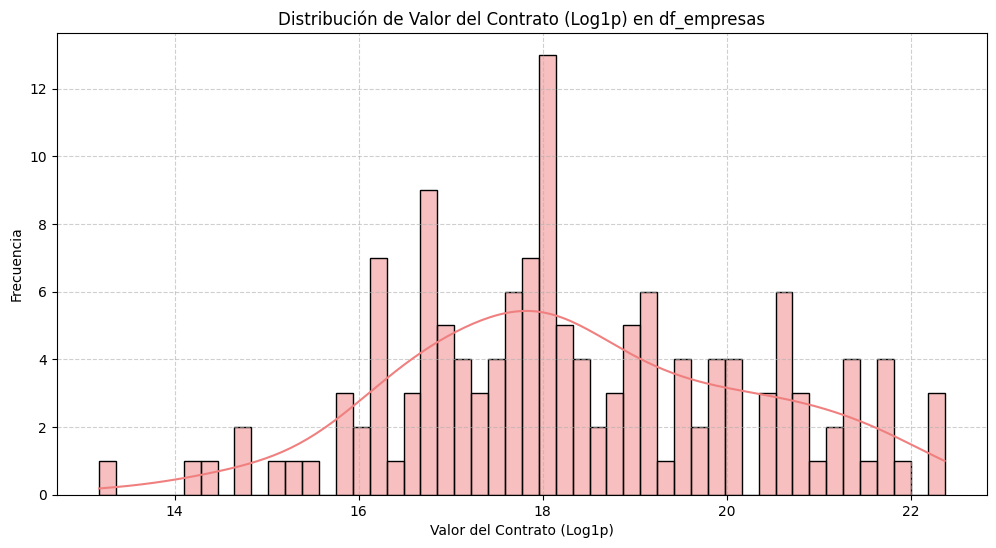


--- Histograma para 'valor_contrato' en df_empresas (Escala Lineal) ---


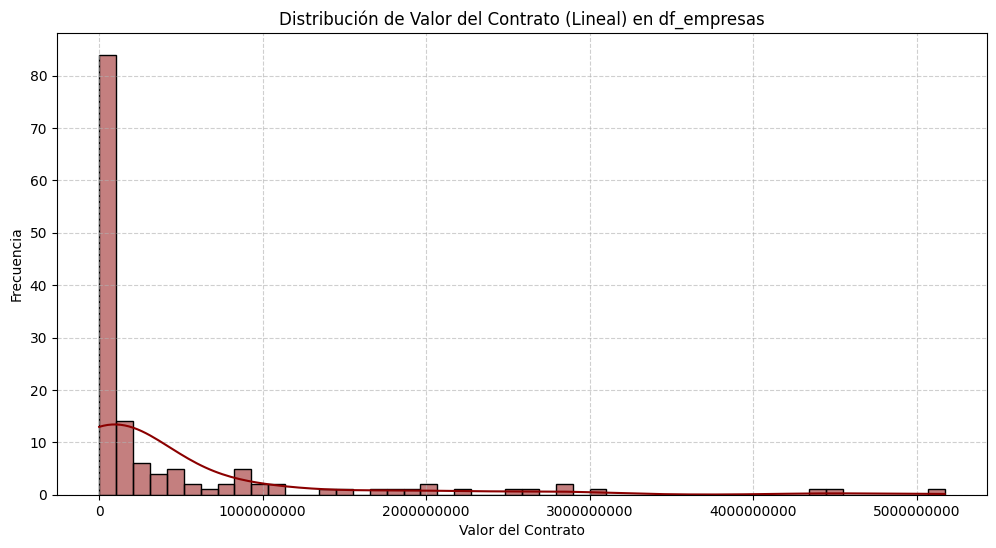


--- Generación de histogramas por DataFrame completada ---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Generando histogramas para 'valor_contrato' de cada nuevo DataFrame ---")

# Histograma para df_cero
print("\n--- Análisis de 'valor_contrato' en df_cero ---")
if not df_cero.empty and (df_cero['valor_contrato'] == 0).all():
    print("  ✅ Todos los contratos en df_cero tienen 'valor_contrato' igual a 0. No se genera histograma.")
else:
    print("  ⚠️ df_cero está vacío o contiene valores diferentes a 0. Se procederá a generar un histograma si aplica.")
    if not df_cero.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(df_cero['valor_contrato'], kde=True, bins=50, color='gray')
        plt.title('Distribución de Valor del Contrato en df_cero')
        plt.xlabel('Valor del Contrato')
        plt.ylabel('Frecuencia')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Histograma para df_ps (con escala logarítmica)
print("\n--- Histograma para 'valor_contrato' en df_ps (Escala Logarítmica) ---")
if not df_ps.empty:
    valor_ps_filtrado = df_ps[df_ps['valor_contrato'] > 0]['valor_contrato']
    if not valor_ps_filtrado.empty:
        valor_ps_log = np.log1p(valor_ps_filtrado)
        plt.figure(figsize=(12, 6))
        sns.histplot(valor_ps_log, kde=True, bins=50, color='skyblue')
        plt.title('Distribución de Valor del Contrato (Log1p) en df_ps')
        plt.xlabel('Valor del Contrato (Log1p)')
        plt.ylabel('Frecuencia')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("  ⚠️ df_ps solo contiene contratos con valor 0 o negativo. No se genera histograma logarítmico.")
else:
    print("  ⚠️ df_ps está vacío. No se genera histograma.")

# Histograma para df_ps (con escala lineal)
print("\n--- Histograma para 'valor_contrato' en df_ps (Escala Lineal) ---")
if not df_ps.empty:
    valor_ps_filtrado = df_ps[df_ps['valor_contrato'] > 0]['valor_contrato']
    if not valor_ps_filtrado.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(valor_ps_filtrado, kde=True, bins=50, color='darkblue')
        plt.title('Distribución de Valor del Contrato (Lineal) en df_ps')
        plt.xlabel('Valor del Contrato')
        plt.ylabel('Frecuencia')
        plt.ticklabel_format(style='plain', axis='x') # Formato lineal
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("  ⚠️ df_ps solo contiene contratos con valor 0 o negativo. No se genera histograma lineal.")
else:
    print("  ⚠️ df_ps está vacío. No se genera histograma.")

# Histograma para df_empresas (con escala logarítmica)
print("\n--- Histograma para 'valor_contrato' en df_empresas (Escala Logarítmica) ---")
if not df_empresas.empty:
    valor_empresas_filtrado = df_empresas[df_empresas['valor_contrato'] > 0]['valor_contrato']
    if not valor_empresas_filtrado.empty:
        valor_empresas_log = np.log1p(valor_empresas_filtrado)
        plt.figure(figsize=(12, 6))
        sns.histplot(valor_empresas_log, kde=True, bins=50, color='lightcoral')
        plt.title('Distribución de Valor del Contrato (Log1p) en df_empresas')
        plt.xlabel('Valor del Contrato (Log1p)')
        plt.ylabel('Frecuencia')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("  ⚠️ df_empresas solo contiene contratos con valor 0 o negativo. No se genera histograma logarítmico.")
else:
    print("  ⚠️ df_empresas está vacío. No se genera histograma.")

# Histograma para df_empresas (con escala lineal)
print("\n--- Histograma para 'valor_contrato' en df_empresas (Escala Lineal) ---")
if not df_empresas.empty:
    valor_empresas_filtrado = df_empresas[df_empresas['valor_contrato'] > 0]['valor_contrato']
    if not valor_empresas_filtrado.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(valor_empresas_filtrado, kde=True, bins=50, color='darkred')
        plt.title('Distribución de Valor del Contrato (Lineal) en df_empresas')
        plt.xlabel('Valor del Contrato')
        plt.ylabel('Frecuencia')
        plt.ticklabel_format(style='plain', axis='x') # Formato lineal
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("  ⚠️ df_empresas solo contiene contratos con valor 0 o negativo. No se genera histograma lineal.")
else:
    print("  ⚠️ df_empresas está vacío. No se genera histograma.")

print("\n--- Generación de histogramas por DataFrame completada ---")

# **ANÁLISIS DE LENGUAJE BÁSICO**


En adelante analizaremos los 2 data set df_empresas y df_ps (o prestadores de servicio) de manera individual





ENFOQUE 1: La representación TF-IDF permite convertir el texto contractual en un espacio vectorial de alta dimensionalidad ponderando la relevancia de los términos según su frecuencia global y local. Sobre esta matriz se aplica K-Means para identificar agrupamientos temáticos mediante la minimización de distancias intra-cluster. Posteriormente, TruncatedSVD reduce la dimensionalidad preservando la estructura semántica dominante y habilitando visualización y estabilidad del clustering. Finalmente, el análisis jerárquico con enlace Ward revela la estructura anidada de similitud entre contratos, permitiendo contrastar coherencia, forma y profundidad de los temas detectados.



In [ ]:
# ============================
# BLOQUE 1: Imports y lectura
# ============================

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score, silhouette_samples

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.rcParams['figure.figsize'] = (8, 6)

# Leer archivo CSV (ajusta la ruta/nombre)
ruta_csv = "/content/drive/MyDrive/hacemos con ingenieria/df_empresas_contratos.csv"   # <--- RUTA AJUSTADA
df = pd.read_csv(ruta_csv)

# Ver primeras filas y tipos de datos
display(df.head())
print(df.dtypes)
print("Shape del dataset:", df.shape)


,nombre_de_la_entidad,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecuci_n,fecha_fin_ejecuci_n,valor_contrato,url_contrato,Año_Contrato,nom_raz_social_contratista_corto
0,GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,otro,2025-08-25,2025-09-02T00:00:00.000,2025-11-30T00:00:00.000,453600000,https://community.secop.gov.co/Public/Tenderin...,2025,GESPRODE
1,GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,otro,2023-06-15,2023-06-16T00:00:00.000,2024-03-31T00:00:00.000,2800000000,https://community.secop.gov.co/Public/Tenderin...,2023,RECREAVALLE
2,VALLE DEL CAUCA - GOBERNACIÓN,PRESTACION DE SERVICIOS DE APOYO A LA GESTION ...,PRESTACION DE SERVICIOS DE APOYO A LA GESTION ...,Prestación de Servicios,2019-11-28,2019-12-03T00:00:00.000,2020-01-03T00:00:00.000,11995200,https://www.contratos.gov.co/consultas/detalle...,2019,GORCA PARTNERS S.A.S
3,VALLE DEL CAUCA - GOBERNACIÓN,ADQUISICION DE 3 MODULOS PARA LA PAGINA WEB CO...,ADQUISICIoN DE 3 MoDULOS PARA LA PAGINA WEB CO...,Prestación de Servicios,2017-11-15,2017-12-06T00:00:00.000,2017-12-31T00:00:00.000,73000000,https://www.contratos.gov.co/consultas/detalle...,2017,VENNEX GROUP S.A.S
4,VALLE DEL CAUCA - GOBERNACIÓN,AUNAR ESFUERZOS ENTRE LA SECRETARIA DE MUJER E...,AUNAR ESFUERZOS ENTRE LA SECRETARIA DE MUJER E...,otro tipo de contrato,2020-02-13,2020-02-14T00:00:00.000,2023-12-14T00:00:00.000,0,https://www.contratos.gov.co/consultas/detalle...,2020,FISCALIA GENERAL DE LA...


nombre_de_la_entidad                object
objeto_a_contratar                  object
objeto_del_proceso                  object
tipo_de_contrato                    object
fecha_de_firma_del_contrato         object
fecha_inicio_ejecuci_n              object
fecha_fin_ejecuci_n                 object
valor_contrato                       int64
url_contrato                        object
Año_Contrato                         int64
nom_raz_social_contratista_corto    object
dtype: object
Shape del dataset: (154, 11)


In [ ]:
# ==========================================
# BLOQUE 2: Construcción de columna "texto"
# ==========================================

# Garantizar que las columnas de texto no tengan NaNs
for col in ["objeto_a_contratar", "objeto_del_proceso"]:
    df[col] = df[col].fillna("").astype(str)

# Combinar ambos campos descriptivos en un solo texto
df["texto"] = df["objeto_a_contratar"] + " " + df["objeto_del_proceso"]

# Limpieza mínima: pasar a minúsculas
df["texto"] = df["texto"].str.lower()

# Vista rápida de la nueva columna
df[["nombre_de_la_entidad", "nom_raz_social_contratista_corto", "texto"]].head()


,nombre_de_la_entidad,nom_raz_social_contratista_corto,texto
0,GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...,GESPRODE,aunar esfuerzos técnicos administrativos y fin...
1,GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...,RECREAVALLE,aunar esfuerzos técnicos administrativos y fin...
2,VALLE DEL CAUCA - GOBERNACIÓN,GORCA PARTNERS S.A.S,prestacion de servicios de apoyo a la gestion ...
3,VALLE DEL CAUCA - GOBERNACIÓN,VENNEX GROUP S.A.S,adquisicion de 3 modulos para la pagina web co...
4,VALLE DEL CAUCA - GOBERNACIÓN,FISCALIA GENERAL DE LA...,aunar esfuerzos entre la secretaria de mujer e...


In [ ]:
# ==================================================
# BLOQUE 2.5: Análisis de frecuencia de UNIGRAMAS
# ==================================================

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

print("--- Analizando los 30 UNIGRAMAS más frecuentes y almacenándolos ---")

# Asegurarnos de que spanish_stop_words_local esté disponible
spanish_stop_words_local = [
    'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para',
    'con', 'no', 'una', 'su', 'al', 'es', 'lo', 'como', 'más', 'pero', 'sus', 'o', 'ha',
    'me', 'si', 'sin', 'sobre', 'este', 'esta', 'estos', 'estas', 'mi', 'tu', 'nuestro',
    'vuestro', 'mi', 'tu', 'nuestro', 'vuestro', 'ese', 'aquel', 'yo', 'tú', 'él', 'ella',
    'nosotros', 'vosotros', 'ellos', 'ellas', 'me', 'te', 'se', 'nos', 'os', 'les', 'les',
    'mis', 'tus', 'sus', 'nuestros', 'vuestros', 'mías', 'tuyas', 'suyas', 'nuestras',
    'vuestras', 'mío', 'tuyo', 'suyo', 'nuestro', 'vuestro', 'mía', 'tuya', 'suya', 'nuestra',
    'vuestra', 'unos', 'unas', 'uno', 'una', 'todo', 'nada', 'poco', 'mucho', 'gran',
    'grande', 'pequeño', 'poca', 'mucha', 'varios', 'varias', 'tanto', 'tan', 'tal', 'casi',
    'siempre', 'nunca', 'jamás', 'aún', 'ya', 'entonces', 'donde', 'cuando', 'mientras',
    'como', 'porque', 'aunque', 'así', 'además', 'pronto', 'tarde', 'hoy', 'ayer', 'mañana',
    'desde', 'hasta', 'hacia', 'entre', 'durante', 'mediante', 'según', 'contra', 'tras',
    'bajo', 'cabe', 'con', 'de', 'desde', 'en', 'entre', 'hacia', 'hasta', 'para', 'por',
    'según', 'sin', 'sobre', 'tras', 'dado', 'mediante', 'excepto', 'salvo', 'incluso',
    'más', 'menos', 'que', 'del', 'están', 'son', 'han', 'estoy', 'está', 'ser', 'estar',
    'fui', 'fue', 'eres', 'soy', 'será', 'estará', 'era', 'eras', 'estaba', 'estábamos',
    'hubo', 'había', 'habían', 'tenía', 'tengo', 'tiene', 'tienen', 'este', 'esta', 'estos',
    'estas', 'eso', 'esa', 'esos', 'esas', 'aquel', 'aquella', 'aquellos', 'aquellas', 'aquello'
]

count_vectorizer = CountVectorizer(stop_words=spanish_stop_words_local, ngram_range=(1,1))
X_count = count_vectorizer.fit_transform(df["texto"])

feature_names = count_vectorizer.get_feature_names_out()
word_counts = X_count.sum(axis=0)
word_freq_df = pd.DataFrame({'word': feature_names, 'count': word_counts.tolist()[0]})

word_freq_df_most = word_freq_df.sort_values(by='count', ascending=False)

print("\nLas 30 UNIGRAMAS más repetidas son:")
print(word_freq_df_most.head(30).to_markdown(index=False))

global top_30_unigrams
top_30_unigrams = word_freq_df_most.head(30)['word'].tolist()
print(f"  ✅ Los 30 unigramas más frecuentes han sido almacenados en 'top_30_unigrams'.")

print("--- Análisis de frecuencia de UNIGRAMAS completado ---")

--- Analizando los 30 UNIGRAMAS más frecuentes y almacenándolos ---

Las 30 UNIGRAMAS más repetidas son:
| word            |   count |
|:----------------|--------:|
| valle           |     260 |
| cauca           |     248 |
| mujeres         |     207 |
| proyecto        |     130 |
| mujer           |     122 |
| aunar           |     122 |
| esfuerzos       |     120 |
| servicios       |     110 |
| equidad         |     107 |
| marco           |     102 |
| financieros     |      92 |
| genero          |      90 |
| administrativos |      89 |
| departamento    |      89 |
| secretaria      |      84 |
| diversidad      |      83 |
| sexual          |      81 |
| apoyo           |      78 |
| poblacion       |      74 |
| desarrollo      |      74 |
| género          |      68 |
| fortalecimiento |      66 |
| denominado      |      61 |
| técnicos        |      59 |
| tecnicos        |      46 |
| prestacion      |      44 |
| atencion        |      44 |
| gestion         |      

In [ ]:
# ==================================================
# BLOQUE 2.5: Análisis de frecuencia de BIGRAMAS
# ==================================================

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

print("--- Analizando los 30 BIGRAMAS más frecuentes y almacenándolos ---")

# Asegurarnos de que spanish_stop_words_local esté disponible
spanish_stop_words_local = [
    'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para',
    'con', 'no', 'una', 'su', 'al', 'es', 'lo', 'como', 'más', 'pero', 'sus', 'o', 'ha',
    'me', 'si', 'sin', 'sobre', 'este', 'esta', 'estos', 'estas', 'mi', 'tu', 'nuestro',
    'vuestro', 'mi', 'tu', 'nuestro', 'vuestro', 'ese', 'aquel', 'yo', 'tú', 'él', 'ella',
    'nosotros', 'vosotros', 'ellos', 'ellas', 'me', 'te', 'se', 'nos', 'os', 'les', 'les',
    'mis', 'tus', 'sus', 'nuestros', 'vuestros', 'mías', 'tuyas', 'suyas', 'nuestras',
    'vuestras', 'mío', 'tuyo', 'suyo', 'nuestro', 'vuestro', 'mía', 'tuya', 'suya', 'nuestra',
    'vuestra', 'unos', 'unas', 'uno', 'una', 'todo', 'nada', 'poco', 'mucho', 'gran',
    'grande', 'pequeño', 'poca', 'mucha', 'varios', 'varias', 'tanto', 'tan', 'tal', 'casi',
    'siempre', 'nunca', 'jamás', 'aún', 'ya', 'entonces', 'donde', 'cuando', 'mientras',
    'como', 'porque', 'aunque', 'así', 'además', 'pronto', 'tarde', 'hoy', 'ayer', 'mañana',
    'desde', 'hasta', 'hacia', 'entre', 'durante', 'mediante', 'según', 'contra', 'tras',
    'bajo', 'cabe', 'con', 'de', 'desde', 'en', 'entre', 'hacia', 'hasta', 'para', 'por',
    'según', 'sin', 'sobre', 'tras', 'dado', 'mediante', 'excepto', 'salvo', 'incluso',
    'más', 'menos', 'que', 'del', 'están', 'son', 'han', 'estoy', 'está', 'ser', 'estar',
    'fui', 'fue', 'eres', 'soy', 'será', 'estará', 'era', 'eras', 'estaba', 'estábamos',
    'hubo', 'había', 'habían', 'tenía', 'tengo', 'tiene', 'tienen', 'este', 'esta', 'estos',
    'estas', 'eso', 'esa', 'esos', 'esas', 'aquel', 'aquella', 'aquellos', 'aquellas', 'aquello'
]

count_vectorizer = CountVectorizer(stop_words=spanish_stop_words_local, ngram_range=(2,2))
X_count = count_vectorizer.fit_transform(df["texto"])

feature_names = count_vectorizer.get_feature_names_out()
word_counts = X_count.sum(axis=0)
word_freq_df = pd.DataFrame({'word': feature_names, 'count': word_counts.tolist()[0]})

word_freq_df_most = word_freq_df.sort_values(by='count', ascending=False)

print("\nLas 30 BIGRAMAS más repetidas son:")
print(word_freq_df_most.head(30).to_markdown(index=False))

global top_30_bigrams
top_30_bigrams = word_freq_df_most.head(30)['word'].tolist()
print(f"  ✅ Los 30 bigramas más frecuentes han sido almacenados en 'top_30_bigrams'.")

print("--- Análisis de frecuencia de BIGRAMAS completado ---")

--- Analizando los 30 BIGRAMAS más frecuentes y almacenándolos ---

Las 30 BIGRAMAS más repetidas son:
| word                        |   count |
|:----------------------------|--------:|
| valle cauca                 |     248 |
| aunar esfuerzos             |     120 |
| departamento valle          |      88 |
| administrativos financieros |      82 |
| marco proyecto              |      79 |
| diversidad sexual           |      77 |
| mujer equidad               |      75 |
| proyecto denominado         |      61 |
| equidad genero              |      57 |
| esfuerzos técnicos          |      56 |
| secretaria mujer            |      55 |
| técnicos administrativos    |      48 |
| equidad género              |      45 |
| genero diversidad           |      42 |
| prestar servicios           |      40 |
| tecnicos administrativos    |      38 |
| prestacion servicios        |      37 |
| apoyo gestion               |      36 |
| esfuerzos tecnicos          |      36 |
| servicios apo

In [ ]:
# ==================================================
# BLOQUE 2.5: Análisis de frecuencia de TRIGRAMAS
# ==================================================

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

print("--- Analizando los 30 TRIGRAMAS más frecuentes y almacenándolos ---")

# Asegurarnos de que spanish_stop_words_local esté disponible
spanish_stop_words_local = [
    'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para',
    'con', 'no', 'una', 'su', 'al', 'es', 'lo', 'como', 'más', 'pero', 'sus', 'o', 'ha',
    'me', 'si', 'sin', 'sobre', 'este', 'esta', 'estos', 'estas', 'mi', 'tu', 'nuestro',
    'vuestro', 'mi', 'tu', 'nuestro', 'vuestro', 'ese', 'aquel', 'yo', 'tú', 'él', 'ella',
    'nosotros', 'vosotros', 'ellos', 'ellas', 'me', 'te', 'se', 'nos', 'os', 'les', 'les',
    'mis', 'tus', 'sus', 'nuestros', 'vuestros', 'mías', 'tuyas', 'suyas', 'nuestras',
    'vuestras', 'mío', 'tuyo', 'suyo', 'nuestro', 'vuestro', 'mía', 'tuya', 'suya', 'nuestra',
    'vuestra', 'unos', 'unas', 'uno', 'una', 'todo', 'nada', 'poco', 'mucho', 'gran',
    'grande', 'pequeño', 'poca', 'mucha', 'varios', 'varias', 'tanto', 'tan', 'tal', 'casi',
    'siempre', 'nunca', 'jamás', 'aún', 'ya', 'entonces', 'donde', 'cuando', 'mientras',
    'como', 'porque', 'aunque', 'así', 'además', 'pronto', 'tarde', 'hoy', 'ayer', 'mañana',
    'desde', 'hasta', 'hacia', 'entre', 'durante', 'mediante', 'según', 'contra', 'tras',
    'bajo', 'cabe', 'con', 'de', 'desde', 'en', 'entre', 'hacia', 'hasta', 'para', 'por',
    'según', 'sin', 'sobre', 'tras', 'dado', 'mediante', 'excepto', 'salvo', 'incluso',
    'más', 'menos', 'que', 'del', 'están', 'son', 'han', 'estoy', 'está', 'ser', 'estar',
    'fui', 'fue', 'eres', 'soy', 'será', 'estará', 'era', 'eras', 'estaba', 'estábamos',
    'hubo', 'había', 'habían', 'tenía', 'tengo', 'tiene', 'tienen', 'este', 'esta', 'estos',
    'estas', 'eso', 'esa', 'esos', 'esas', 'aquel', 'aquella', 'aquellos', 'aquellas', 'aquello'
]

count_vectorizer = CountVectorizer(stop_words=spanish_stop_words_local, ngram_range=(3,3))
X_count = count_vectorizer.fit_transform(df["texto"])

feature_names = count_vectorizer.get_feature_names_out()
word_counts = X_count.sum(axis=0)
word_freq_df = pd.DataFrame({'word': feature_names, 'count': word_counts.tolist()[0]})

word_freq_df_most = word_freq_df.sort_values(by='count', ascending=False)

print("\nLas 30 TRIGRAMAS más repetidas son:")
print(word_freq_df_most.head(30).to_markdown(index=False))

global top_30_trigrams
top_30_trigrams = word_freq_df_most.head(30)['word'].tolist()
print(f"  ✅ Los 30 trigramas más frecuentes han sido almacenados en 'top_30_trigrams'.")

print("--- Análisis de frecuencia de TRIGRAMAS completado ---")

--- Analizando los 30 TRIGRAMAS más frecuentes y almacenándolos ---

Las 30 TRIGRAMAS más repetidas son:
| word                                 |   count |
|:-------------------------------------|--------:|
| departamento valle cauca             |      86 |
| aunar esfuerzos técnicos             |      56 |
| secretaria mujer equidad             |      55 |
| técnicos administrativos financieros |      48 |
| esfuerzos técnicos administrativos   |      48 |
| mujer equidad genero                 |      41 |
| equidad genero diversidad            |      41 |
| genero diversidad sexual             |      40 |
| marco proyecto denominado            |      39 |
| esfuerzos tecnicos administrativos   |      36 |
| aunar esfuerzos tecnicos             |      36 |
| equidad género diversidad            |      34 |
| mujer equidad género                 |      34 |
| género diversidad sexual             |      34 |
| tecnicos administrativos financieros |      34 |
| cauca aunar esfuerzos     

In [ ]:
# ====================================
# BLOQUE 3: Vectorización con TF-IDF
# ====================================

# Lista de palabras vacías en español (ejemplo básico, se puede ampliar)
spanish_stop_words = [
    'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para',
    'con', 'no', 'una', 'su', 'al', 'es', 'lo', 'como', 'más', 'pero', 'sus', 'o', 'ha',
    'me', 'si', 'sin', 'sobre', 'este', 'esta', 'estos', 'estas', 'mi', 'tu', 'nuestro',
    'vuestro', 'mi', 'tu', 'nuestro', 'vuestro', 'ese', 'aquel', 'yo', 'tú', 'él', 'ella',
    'nosotros', 'vosotros', 'ellos', 'ellas', 'me', 'te', 'se', 'nos', 'os', 'les', 'les',
    'mis', 'tus', 'sus', 'nuestros', 'vuestros', 'mías', 'tuyas', 'suyas', 'nuestras',
    'vuestras', 'mío', 'tuyo', 'suyo', 'nuestro', 'vuestro', 'mía', 'tuya', 'suya', 'nuestra',
    'vuestra', 'unos', 'unas', 'uno', 'una', 'todo', 'nada', 'poco', 'mucho', 'gran',
    'grande', 'pequeño', 'poca', 'mucha', 'varios', 'varias', 'tanto', 'tan', 'tal', 'casi',
    'siempre', 'nunca', 'jamás', 'aún', 'ya', 'entonces', 'donde', 'cuando', 'mientras',
    'como', 'porque', 'aunque', 'así', 'además', 'pronto', 'tarde', 'hoy', 'ayer', 'mañana',
    'desde', 'hasta', 'hacia', 'entre', 'durante', 'mediante', 'según', 'contra', 'tras',
    'bajo', 'cabe', 'con', 'de', 'desde', 'en', 'entre', 'hacia', 'hasta', 'para', 'por',
    'según', 'sin', 'sobre', 'tras', 'dado', 'mediante', 'excepto', 'salvo', 'incluso',
    'más', 'menos', 'que', 'del', 'están', 'son', 'han', 'estoy', 'está', 'ser', 'estar',
    'fui', 'fue', 'eres', 'soy', 'será', 'estará', 'era', 'eras', 'estaba', 'estábamos',
    'hubo', 'había', 'habían', 'tenía', 'tengo', 'tiene', 'tienen', 'este', 'esta', 'estos',
    'estas', 'eso', 'esa', 'esos', 'esas', 'aquel', 'aquella', 'aquellos', 'aquellas', 'aquello',
    'gobernacion', 'gobernación', 'esfuerzos', 'administrativos', 'técnicos', 'tecnicos', 'prestacion', 'prestación', 'marco', 'proyecto'
]

# --- Nuevo: Input para elegir tipo de N-grama y configuración dinámica ---
print("--- Configuración dinámica de TF-IDF ---")
print("Por favor, elija el tipo de análisis de n-gramas a realizar:")
print("1. Unigramas (palabras individuales)")
print("2. Bigramas (grupos de dos palabras)")
print("3. Trigramas (grupos de tres palabras)")

choice_ngram = input("Ingrese el número de su elección (1, 2 o 3): ")

selected_ngram_range = (1, 1)
top_ngrams_to_consider = []

if choice_ngram == '1':
    selected_ngram_range = (1, 1)
    if 'top_30_unigrams' in globals():
        top_ngrams_to_consider = top_30_unigrams
    print("  ✅ Se ha seleccionado el análisis de Unigramas.")
elif choice_ngram == '2':
    selected_ngram_range = (2, 2)
    if 'top_30_bigrams' in globals():
        top_ngrams_to_consider = top_30_bigrams
    print("  ✅ Se ha seleccionado el análisis de Bigramas.")
elif choice_ngram == '3':
    selected_ngram_range = (3, 3)
    if 'top_30_trigrams' in globals():
        top_ngrams_to_consider = top_30_trigrams
    print("  ✅ Se ha seleccionado el análisis de Trigramas.")
else:
    print("  ⚠️ Opción no válida. Se utilizarán Unigramas por defecto.")
    selected_ngram_range = (1, 1)
    if 'top_30_unigrams' in globals():
        top_ngrams_to_consider = top_30_unigrams

# --- Nuevo: Input para decidir si excluir o no los n-gramas más frecuentes ---
exclude_top_ngrams_choice = input("¿Desea excluir los 30 n-gramas más frecuentes de su selección? (si/no): ").lower()

final_stop_words_list = list(spanish_stop_words)

if exclude_top_ngrams_choice == 'si':
    final_stop_words_list.extend(top_ngrams_to_consider)
    print("  ✅ Se excluirán los 30 n-gramas más frecuentes.")
elif exclude_top_ngrams_choice == 'no':
    print("  ❌ No se excluirán los 30 n-gramas más frecuentes.")
else:
    print("  ⚠️ Opción no válida. No se excluirán los 30 n-gramas más frecuentes por defecto.")

# Combinar stop_words base con las top N-gramas a excluir (condicionalmente)
# Usamos set para asegurar unicidad y luego convertimos a list para el TfidfVectorizer
final_stop_words = list(set(final_stop_words_list))

vectorizer = TfidfVectorizer(
    stop_words=final_stop_words, # Ahora se usa la lista de palabras vacías personalizada
    max_df=0.8,               # descarta términos que aparecen en >80% de documentos
    min_df=1,                 # descarta términos que solo aparecen en 1 contrato
    ngram_range=selected_ngram_range # n-gramas seleccionados dinámicamente
)

X_tfidf = vectorizer.fit_transform(df["texto"])
print("Shape matriz TF-IDF (n_contratos, n_terminos):", X_tfidf.shape)
print("--- Configuración dinámica de TF-IDF completada ---")

--- Configuración dinámica de TF-IDF ---
Por favor, elija el tipo de análisis de n-gramas a realizar:
1. Unigramas (palabras individuales)
2. Bigramas (grupos de dos palabras)
3. Trigramas (grupos de tres palabras)


KeyboardInterrupt: Interrupted by user

In [ ]:
# ============================================
# BLOQUE 4: Reducción de dimensión (SVD 20D)
# ============================================

n_componentes = 20  # ajustable; para 154 contratos, 20 es razonable

svd = TruncatedSVD(n_components=n_componentes, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

print("Shape espacio reducido (SVD):", X_svd.shape)
print("Varianza explicada acumulada:", svd.explained_variance_ratio_.sum())


Shape espacio reducido (SVD): (154, 20)
Varianza explicada acumulada: 0.33278385564405955


k = 2, silhouette = 0.412
k = 3, silhouette = 0.309
k = 4, silhouette = 0.288
k = 5, silhouette = 0.355
k = 6, silhouette = 0.345
k = 7, silhouette = 0.336
k = 8, silhouette = 0.394
k = 9, silhouette = 0.420
k = 10, silhouette = 0.448
k = 11, silhouette = 0.469
k = 12, silhouette = 0.494
k = 13, silhouette = 0.511
k = 14, silhouette = 0.376
k = 15, silhouette = 0.422


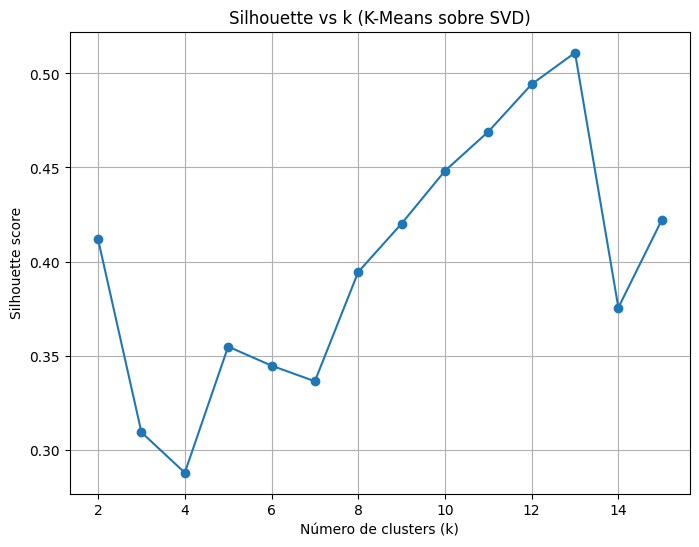

In [ ]:
# ==================================================
# BLOQUE 5: Silhouette para elegir número de clusters
# ==================================================

range_k = range(2, 16)  # probamos k de 2 a 8
sil_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_svd)  # clustering en espacio reducido
    score = silhouette_score(X_svd, labels)
    sil_scores.append(score)
    print(f"k = {k}, silhouette = {score:.3f}")

# Gráfica Silhouette vs k
plt.figure()
plt.plot(list(range_k), sil_scores, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k (K-Means sobre SVD)")
plt.grid(True)
plt.show()


In [ ]:
# =====================================================
# BLOQUE 6: K-Means final + palabras top por cluster
# =====================================================

# AJUSTA este valor según la gráfica de silhouette
k_optimo = 4 # <-- CAMBIA a lo que te dé mejor sentido

# 6.1 Entrenamos K-Means en el espacio reducido (SVD) para agrupar contratos
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(X_svd)

df["cluster_kmeans"] = labels_final

# 6.2 Re-entrenamos K-Means en el espacio TF-IDF para obtener centroides en "término"
kmeans_tfidf = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
kmeans_tfidf.fit(X_tfidf)

terms = np.array(vectorizer.get_feature_names_out())

for i, centroide in enumerate(kmeans_tfidf.cluster_centers_):
    top_idx = centroide.argsort()[::-1][:10]  # 10 términos más relevantes
    print(f"\n>>> Cluster {i}:")
    print(", ".join(terms[top_idx]))




>>> Cluster 0:
aseo secretaria, acuerdo especificaciones, artículos oficina, papelería artículos, sexual acuerdo, elementos cafetería, cafetería papelería, oficina aseo, suministro elementos, técnicas exigidas

>>> Cluster 1:
secretaría mujer, equidad género, género diversidad, aunar financieros, muerte erradicacion, acuerdo cultura, vida muerte, cultura genera, genera vida, erradicacion ablacion

>>> Cluster 2:
valle cauca, departamento valle, equidad genero, genero diversidad, apoyo gestion, servicios apoyo, secretaria mujer, diversidad sexual, prestar servicios, mujer equidad

>>> Cluster 3:
mujeres poblacion, aunar financieros, poblacion diversa, financieros desarrollar, desarrollar estrategia, estrategia permita, generar estrategias, financieros generar, estrategias territoriales, cauca aunar


In [ ]:
# =========================================================
# BLOQUE 7: Entidades y contratistas por cluster temático
# ========================================================

# Entidades por cluster
entidades_cluster = (
    df.groupby("cluster_kmeans")["nombre_de_la_entidad"]
      .value_counts()
      .rename("conteo")
      .reset_index()
)

print("=== Entidades por cluster ===")
display(entidades_cluster)

# Contratistas por cluster
contratistas_cluster = (
    df.groupby("cluster_kmeans")["nom_raz_social_contratista_corto"]
      .value_counts()
      .rename("conteo")
      .reset_index()
)

print("=== Contratistas por cluster ===")
display(contratistas_cluster)

=== Entidades por cluster ===


,cluster_kmeans,nombre_de_la_entidad,conteo
0,0,VALLE DEL CAUCA - GOBERNACIÓN,66
1,0,GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...,55
2,0,SECRETARIA DE CULTURA VALLE,5
3,0,GOBERNACIÓN DEL VALLE DEL CAUCA - SECRETARIA D...,3
4,0,GOBERNACIÓN VALLE DEL CAUCA -SECRETARIA DE SALUD,2
5,0,GOBERNACION DEL VALLE - SECRETARIA DE ASUNTOS ...,1
6,0,GOBERNACION DEL VALLE DEL CAUCA - DEPARTAMENTO...,1
7,0,GOBERNACIÓN DEL VALLE DEL CAUCA - SECRETARÍA D...,1
8,0,SECRETARIA DE PAZ TERRITORIAL Y RECONCILIACIÓN,1
9,1,GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...,7


=== Contratistas por cluster ===


,cluster_kmeans,nom_raz_social_contratista_corto,conteo
0,0,CORPOVALLE Unificado,14
1,0,CONSEJO DE GOBIERNO PR...,7
2,0,FONDO MIXTO,7
3,0,ORIVAC,5
4,0,SOCIEDAD TELEVISION DE...,4
...,...,...,...
83,0,VENNEX GROUP SAS,1
84,1,COMERCIALIZADORA RUESA...,7
85,2,OSCAR EDUARDO SOLARTE...,5
86,2,LUIS ALBERTO GONZÁLEZ...,3


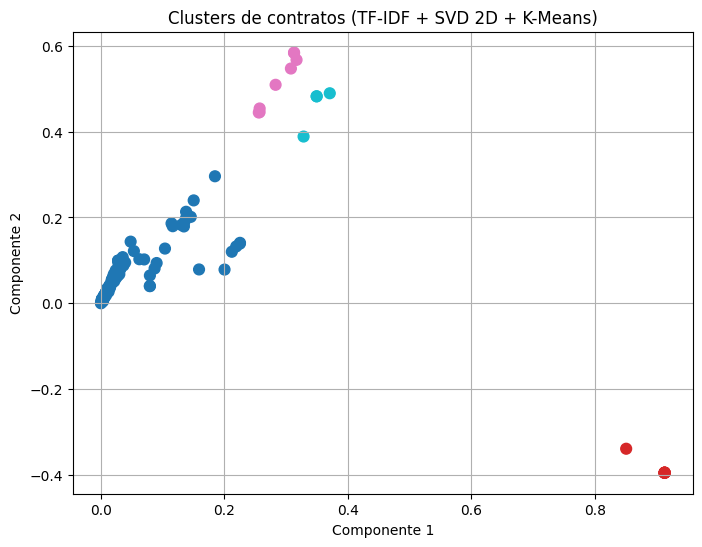

In [ ]:
# =================================================
# BLOQUE 8: Visualización 2D (SVD 2D + K-Means)
# =================================================

# Recalcular una proyección a 2 componentes SOLO para visualizar
svd_2d = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd_2d.fit_transform(X_tfidf)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_2d[:, 0], X_2d[:, 1],
    c=df["cluster_kmeans"], cmap="tab10", s=60
)

plt.title("Clusters de contratos (TF-IDF + SVD 2D + K-Means)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)

# Opcional: anotar cada punto con índice o entidad
# El usuario solicitó eliminar esta sección.
# for i, txt in enumerate(df.index):
#     plt.annotate(str(txt), (X_2d[i, 0]+0.02, X_2d[i, 1]+0.02), fontsize=7)

plt.show()

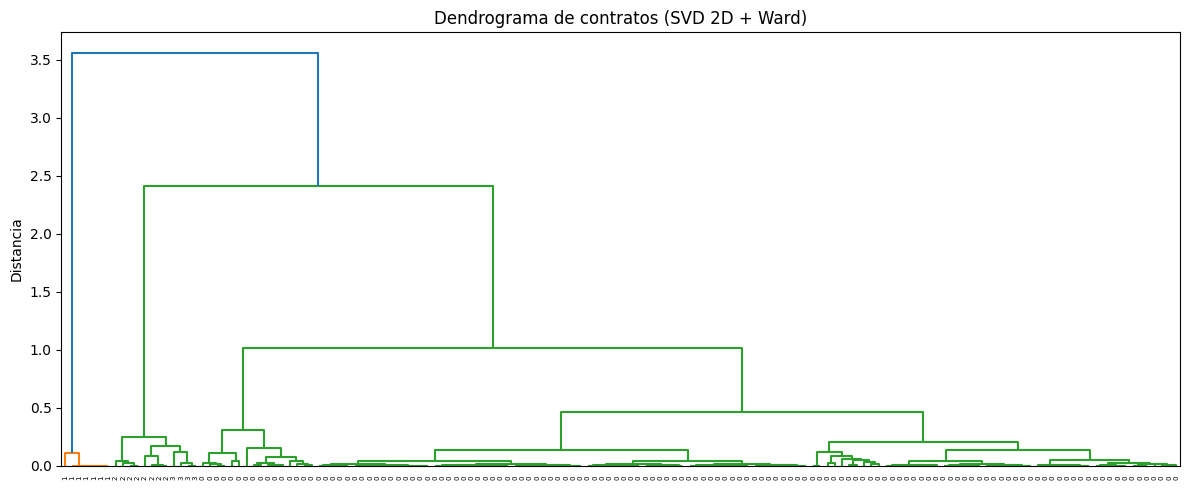

In [ ]:
# =====================================================
# BLOQUE 9: Clustering jerárquico + dendrograma (Ward)
# =====================================================

# Usamos la proyección 2D para que el dendrograma sea manejable
Z = linkage(X_2d, method="ward")

plt.figure(figsize=(12, 5))
dendrogram(
    Z,
    labels=df["cluster_kmeans"].astype(str).tolist(),  # etiqueta con cluster actual
    leaf_rotation=90
)
plt.title("Dendrograma de contratos (SVD 2D + Ward)")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()


# **ANÁLISIS DE LENGUAJE AVANZADO**



ENFOQUE 2: (Embeddings → UMAP → HDBSCAN)
En una primera etapa, los campos de texto objeto_a_contratar y objeto_del_proceso se combinaron y se transformaron en vectores densos mediante un modelo de sentence embeddings (Transformer multilingüe), capaz de capturar similitud semántica más allá de la coincidencia literal de palabras. Posteriormente, se aplicó UMAP como técnica de reducción de dimensionalidad no lineal para preservar la estructura geométrica local y global del espacio de embeddings en un subespacio de menor dimensión adecuado para clustering. Finalmente, se utilizó HDBSCAN como algoritmo de agrupamiento por densidad, permitiendo identificar clusters temáticos de tamaño y forma arbitrarios, así como contratos considerados ruido. Este enfoque conforma un esquema de agrupamiento de estado del arte para texto, robusto y escalable a miles de contratos públicos.

In [ ]:
# BLOQUE 0 - Instalación de librerías externas
!pip install -q sentence-transformers umap-learn hdbscan


In [ ]:
# BLOQUE 1 - Imports principales y ruta del CSV

import pandas as pd
import numpy as np

from sentence_transformers import SentenceTransformer
import umap
import hdbscan

# Para medir tiempos (opcional pero útil)
import time

# Ruta del dataset (la que me diste)
ruta_csv = "/content/drive/MyDrive/hacemos con ingenieria/df_empresas_contratos.csv"

print("Librerías importadas y ruta definida.")


Librerías importadas y ruta definida.


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
# BLOQUE 2 - Carga del dataset y revisión básica

df = pd.read_csv(ruta_csv)

print("Datos cargados correctamente.")
print("Shape del dataframe:", df.shape)
print("\nColumnas disponibles:")
print(df.columns.tolist())

print("\nPrimeras filas:")
display(df.head(5))


Datos cargados correctamente.
Shape del dataframe: (154, 11)

Columnas disponibles:
['nombre_de_la_entidad', 'objeto_a_contratar', 'objeto_del_proceso', 'tipo_de_contrato', 'fecha_de_firma_del_contrato', 'fecha_inicio_ejecuci_n', 'fecha_fin_ejecuci_n', 'valor_contrato', 'url_contrato', 'Año_Contrato', 'nom_raz_social_contratista_corto']

Primeras filas:


,nombre_de_la_entidad,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecuci_n,fecha_fin_ejecuci_n,valor_contrato,url_contrato,Año_Contrato,nom_raz_social_contratista_corto
0,GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,otro,2025-08-25,2025-09-02T00:00:00.000,2025-11-30T00:00:00.000,453600000,https://community.secop.gov.co/Public/Tenderin...,2025,GESPRODE
1,GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,otro,2023-06-15,2023-06-16T00:00:00.000,2024-03-31T00:00:00.000,2800000000,https://community.secop.gov.co/Public/Tenderin...,2023,RECREAVALLE
2,VALLE DEL CAUCA - GOBERNACIÓN,PRESTACION DE SERVICIOS DE APOYO A LA GESTION ...,PRESTACION DE SERVICIOS DE APOYO A LA GESTION ...,Prestación de Servicios,2019-11-28,2019-12-03T00:00:00.000,2020-01-03T00:00:00.000,11995200,https://www.contratos.gov.co/consultas/detalle...,2019,GORCA PARTNERS S.A.S
3,VALLE DEL CAUCA - GOBERNACIÓN,ADQUISICION DE 3 MODULOS PARA LA PAGINA WEB CO...,ADQUISICIoN DE 3 MoDULOS PARA LA PAGINA WEB CO...,Prestación de Servicios,2017-11-15,2017-12-06T00:00:00.000,2017-12-31T00:00:00.000,73000000,https://www.contratos.gov.co/consultas/detalle...,2017,VENNEX GROUP S.A.S
4,VALLE DEL CAUCA - GOBERNACIÓN,AUNAR ESFUERZOS ENTRE LA SECRETARIA DE MUJER E...,AUNAR ESFUERZOS ENTRE LA SECRETARIA DE MUJER E...,otro tipo de contrato,2020-02-13,2020-02-14T00:00:00.000,2023-12-14T00:00:00.000,0,https://www.contratos.gov.co/consultas/detalle...,2020,FISCALIA GENERAL DE LA...


In [ ]:
# BLOQUE 3 - Preprocesamiento de texto y concatenación de campos relevantes

# Aseguramos que las columnas de texto existan
cols_texto = ['objeto_a_contratar', 'objeto_del_proceso']

for c in cols_texto:
    if c not in df.columns:
        raise ValueError(f"La columna '{c}' no está en el dataframe. Revisa el CSV.")

# Rellenar NaN con string vacío
df[cols_texto] = df[cols_texto].fillna("")

# (Opcional) pequeña función de limpieza ligera
def limpiar_texto(t):
    # Aquí puedes añadir más reglas de limpieza si quieres:
    # quitar mayúsculas, signos, etc.
    # Por ahora mantenemos algo simple para no destruir contexto.
    t = str(t).strip()
    return t

for c in cols_texto:
    df[c] = df[c].apply(limpiar_texto)

# Crear una columna combinada de texto (esto es lo que vamos a embeddear)
df['texto_contrato'] = df['objeto_a_contratar'] + " " + df['objeto_del_proceso']

print("Columna 'texto_contrato' creada. Ejemplos:")
display(df[['objeto_a_contratar', 'objeto_del_proceso', 'texto_contrato']].head(5))


Columna 'texto_contrato' creada. Ejemplos:


,objeto_a_contratar,objeto_del_proceso,texto_contrato
0,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...
1,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...
2,PRESTACION DE SERVICIOS DE APOYO A LA GESTION ...,PRESTACION DE SERVICIOS DE APOYO A LA GESTION ...,PRESTACION DE SERVICIOS DE APOYO A LA GESTION ...
3,ADQUISICION DE 3 MODULOS PARA LA PAGINA WEB CO...,ADQUISICIoN DE 3 MoDULOS PARA LA PAGINA WEB CO...,ADQUISICION DE 3 MODULOS PARA LA PAGINA WEB CO...
4,AUNAR ESFUERZOS ENTRE LA SECRETARIA DE MUJER E...,AUNAR ESFUERZOS ENTRE LA SECRETARIA DE MUJER E...,AUNAR ESFUERZOS ENTRE LA SECRETARIA DE MUJER E...


In [ ]:
# BLOQUE 4 - Cálculo de embeddings con Sentence-Transformers

# Modelo recomendado: pequeño, multilingüe, muy eficiente en Colab.
# Hiperparámetro clave: puedes cambiar el modelo por otro más grande si tienes GPU
#   'paraphrase-multilingual-MiniLM-L12-v2' (384 dims)
#   Otro posible: 'distiluse-base-multilingual-cased-v2' (512 dims aprox.)
modelo_embeddings = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"

print(f"Cargando modelo de embeddings: {modelo_embeddings}")
t0 = time.time()
embedder = SentenceTransformer(modelo_embeddings)
t1 = time.time()
print(f"Modelo cargado en {t1 - t0:.2f} segundos.")

# Extraer la lista de textos (convertimos a lista de strings)
textos = df['texto_contrato'].astype(str).tolist()

print(f"Generando embeddings para {len(textos)} contratos. Esto puede tardar un poco...")
t0 = time.time()
embeddings = embedder.encode(
    textos,
    batch_size=32,      # HIPERPARÁMETRO: si tienes poca RAM, bájale; si tienes GPU, súbelo
    show_progress_bar=True,
    convert_to_numpy=True,
    normalize_embeddings=True  # Normalizamos para que la métrica coseno funcione mejor
)
t1 = time.time()
print(f"Embeddings generados en {t1 - t0:.2f} segundos.")
print("Shape de la matriz de embeddings:", embeddings.shape)


Cargando modelo de embeddings: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Modelo cargado en 13.36 segundos.
Generando embeddings para 154 contratos. Esto puede tardar un poco...


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

Embeddings generados en 27.34 segundos.
Shape de la matriz de embeddings: (154, 384)


In [ ]:
# BLOQUE 5 - Reducción de dimensionalidad con UMAP

# HIPERPARÁMETROS importantes de UMAP:
#   n_neighbors: controla qué tan local/global es la estructura capturada.
#                Valores típicos: 5–50. Menor = más local, mayor = más global.
#   n_components: dimensiones finales (2 para visualización, 5–20 para clustering).
#   min_dist: qué tan "apretados" quedan los puntos (0.0 = muy compactos).
#   metric: recomendada 'cosine' cuando los embeddings están normalizados.

umap_reducer = umap.UMAP(
    n_neighbors=15,       # ajustar según coherencia de clusters
    n_components=5,       # 2 para visualización; 5–10 para clustering más fino
    min_dist=0.1,
    metric='cosine',
    random_state=42
)

print("Ajustando UMAP y reduciendo dimensionalidad...")
t0 = time.time()
embeddings_umap = umap_reducer.fit_transform(embeddings)
t1 = time.time()
print(f"UMAP completado en {t1 - t0:.2f} segundos.")
print("Shape de la matriz reducida (UMAP):", embeddings_umap.shape)


Ajustando UMAP y reduciendo dimensionalidad...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP completado en 10.22 segundos.
Shape de la matriz reducida (UMAP): (154, 5)


In [ ]:
# BLOQUE 6 - Clustering de densidad con HDBSCAN

# HIPERPARÁMETROS clave de HDBSCAN:
#   min_cluster_size: tamaño mínimo de cada cluster.
#                     Si pones valores muy grandes, tendrás pocos clusters y mucho ruido.
#                     Si pones muy pequeño, saldrán muchos clusters pequeños.
#                     Regla típica inicial: 5–30 según el tamaño del dataset.
#   min_samples: controla cuánto ruido tolera. None = igual a min_cluster_size.
#   metric: euclidean funciona bien después de UMAP, aunque UMAP ya aplastó el espacio.
#   cluster_selection_method: 'eom' suele dar clusters más estables.

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=15,          # HIPERPARÁMETRO: prueba 10, 20, 30 según número de contratos
    min_samples=None,             # puede probarse con 3–10 si quieres más ruido
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)

print("Ajustando HDBSCAN sobre el espacio UMAP...")
t0 = time.time()
cluster_labels = clusterer.fit_predict(embeddings_umap)
t1 = time.time()
print(f"HDBSCAN completado en {t1 - t0:.2f} segundos.")

# HDBSCAN asigna -1 a los puntos considerados ruido
print("\nResumen rápido de etiquetas de cluster:")
unique, counts = np.unique(cluster_labels, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} contratos")


Ajustando HDBSCAN sobre el espacio UMAP...
HDBSCAN completado en 0.02 segundos.

Resumen rápido de etiquetas de cluster:
Cluster -1: 14 contratos
Cluster 0: 55 contratos
Cluster 1: 17 contratos
Cluster 2: 68 contratos


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# BLOQUE 7 - Añadir etiquetas de cluster al dataframe y exploración básica

df['cluster_hdbscan'] = cluster_labels

print("\nVista rápida del dataframe con columna de cluster:")
display(df[['nombre_de_la_entidad',
            'nom_raz_social_contratista_corto',
            'texto_contrato',
            'cluster_hdbscan']].head(10))

# Resumen por cluster (sin el ruido -1)
print("\nResumen por cluster (excluyendo ruido -1):")
df_clusters = df[df['cluster_hdbscan'] != -1].groupby('cluster_hdbscan').agg({
    'texto_contrato': 'count',
    'nombre_de_la_entidad': pd.Series.nunique,
    'nom_raz_social_contratista_corto': pd.Series.nunique,
    'valor_contrato': ['count', 'mean', 'sum']
})

df_clusters.columns = [
    'n_contratos',
    'n_entidades_distintas',
    'n_contratistas_distintos',
    'n_contratos_valorados',
    'valor_promedio',
    'valor_total'
]

display(df_clusters)



Vista rápida del dataframe con columna de cluster:


,nombre_de_la_entidad,nom_raz_social_contratista_corto,texto_contrato,cluster_hdbscan
0,GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...,GESPRODE,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,0
1,GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...,RECREAVALLE,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,2
2,VALLE DEL CAUCA - GOBERNACIÓN,GORCA PARTNERS S.A.S,PRESTACION DE SERVICIOS DE APOYO A LA GESTION ...,0
3,VALLE DEL CAUCA - GOBERNACIÓN,VENNEX GROUP S.A.S,ADQUISICION DE 3 MODULOS PARA LA PAGINA WEB CO...,2
4,VALLE DEL CAUCA - GOBERNACIÓN,FISCALIA GENERAL DE LA...,AUNAR ESFUERZOS ENTRE LA SECRETARIA DE MUJER E...,0
5,VALLE DEL CAUCA - GOBERNACIÓN,FISCALIA GENERAL DE LA...,AUNAR ESFUERZOS PARA LA ARTICULACION COORDINAC...,0
6,VALLE DEL CAUCA - GOBERNACIÓN,FISCALIA GENERAL DE LA...,AUNAR ESFUERZOS PARA LA ARTICULACION COORDINAC...,0
7,VALLE DEL CAUCA - GOBERNACIÓN,UNIVERSIDAD ICESI,AUNAR ESFUERZOS TECNICOS ADMINISTRATIVOS Y FIN...,2
8,VALLE DEL CAUCA - GOBERNACIÓN,FUNDACION DE APOYO AL...,AUNAR ESFUERZOS RECURSOS HUMANOS TECNICOS Y LO...,2
9,VALLE DEL CAUCA - GOBERNACIÓN,ORIVAC,CAPACITAR A 20 MUJERES INDIGENAS EMBERA EN EL ...,0



Resumen por cluster (excluyendo ruido -1):


,n_contratos,n_entidades_distintas,n_contratistas_distintos,n_contratos_valorados,valor_promedio,valor_total
cluster_hdbscan,,,,,,
0,55,5,32,55,1.520277e+08,8361524903
1,17,2,9,17,8.822508e+08,14998263143
2,68,6,45,68,4.551981e+08,30953474038


Generando embedding 2D para visualización con UMAP...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


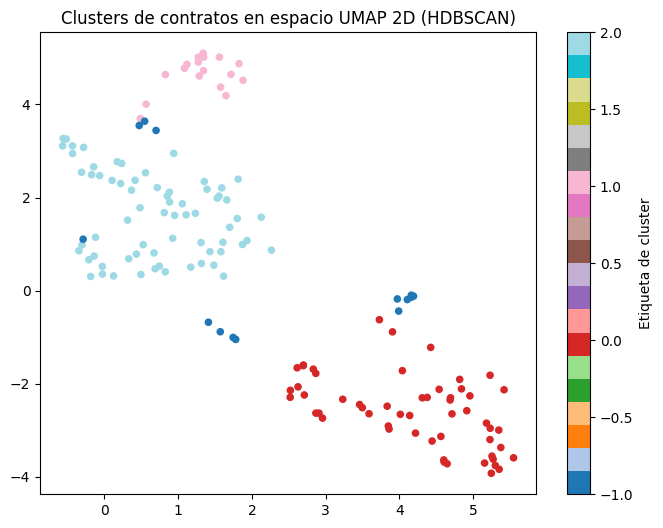

In [ ]:
# BLOQUE 8 (OPCIONAL) - Visualización 2D de los clusters

import matplotlib.pyplot as plt

print("Generando embedding 2D para visualización con UMAP...")
umap_2d = umap.UMAP(
    n_neighbors=15,
    n_components=2,
    min_dist=0.1,
    metric='cosine',
    random_state=42
).fit_transform(embeddings)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    umap_2d[:, 0],
    umap_2d[:, 1],
    c=cluster_labels,
    s=20,
    cmap='tab20'
)
plt.title("Clusters de contratos en espacio UMAP 2D (HDBSCAN)")
plt.colorbar(scatter, label='Etiqueta de cluster')
plt.show()


In [ ]:
custom_stopwords = list(set([
    # Stopwords españolas (tu lista original)
    'de','la','que','el','en','y','a','los','del','se','las','por','un','para','con','no','una','su','al','es','lo',
    'como','más','pero','sus','o','ha','me','si','sin','sobre','este','esta','estos','estas','mi','tu','nuestro',
    'vuestro','ese','aquel','yo','tú','él','ella','nosotros','vosotros','ellos','ellas','te','nos','os','les',
    'mis','tus','sus','nuestros','vuestros','mías','tuyas','suyas','nuestras','vuestras','mío','tuyo','suyo',
    'mía','tuya','suya','unos','unas','uno','todo','nada','poco','mucho','gran','grande','pequeño','poca','mucha',
    'varios','varias','tanto','tan','tal','casi','siempre','nunca','jamás','aún','ya','entonces','donde','cuando',
    'mientras','porque','aunque','así','además','pronto','tarde','hoy','ayer','mañana','desde','hasta','hacia',
    'entre','durante','mediante','según','contra','tras','bajo','cabe','dado','excepto','salvo','incluso','menos',
    'están','son','han','estoy','está','ser','estar','fui','fue','eres','soy','será','estará','era','eras',
    'estaba','estábamos','hubo','había','habían','tenía','tengo','tiene','tienen','eso','esa','esos','esas',
    'aquellos','aquellas','aquello','gobernacion','gobernación','esfuerzos','administrativos','técnicos',
    'tecnicos','prestacion','prestación','marco','proyecto',

    # Ruido de bigramas y artefactos
    'dentro', 'sexual dentro', 'diversidad sexual dentro',
    'basadas', 'basada',

    # Terminos genéricos sin carga temática
    'acuerdo', 'gerencia', 'institucionalidad',
    'servicios', 'gestión', 'gestionar',

    # Palabras hipergenerales
    'mujeres', 'mujer',   # para que emerjan temas NO triviales
    'poblacion', 'población',
    'diversa', 'diversidad',  # ya lo sabemos del cluster 0
    'económico', 'economico', 'económica', 'economica',

    # Opcional: Ruido geográfico
    'cali', 'valle', 'cauca', 'valle cauca', 'vallecaucanas',

    # Verbos genéricos que no aportan nada
    'desarrollar', 'permita'

    # Ruido territorial / institucional
    'valle','cauca','valle cauca','departamento','departamento valle','secretaria',
    'secretaría','entidad','institucional','institucionales','gestion', 'servicio', 'denominado', 'permita',
    'sexual dentro',
    'genero', 'género',

    # Ruido de contratación administrativa
    'apoyo','fortalecimiento','desarrollo','integral','implementación','realizar',
    'estrategia','estrategias','aunar','aunar financieros','financieros','actividad',
    'actividades','servicios','convenio','convenios','apoyar','brindar','prestar',
    'gestión','gestionar','coordinación','elaboración','ejecución','cumplimiento', 'espacios', 'incentiven', 'generar', 'equidad', 'generación'

    # Ruido superfrecuente de bigramas/trigramas
    'de la','de las','de los','para la','para el','con el fin','en el','en la','basadas en', 'fin', 'sexual'
]))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 1️⃣ Crear la columna de texto a partir de las dos variables de objeto
df["texto_objeto"] = (
    df["objeto_a_contratar"].fillna("").astype(str) + " " +
    df["objeto_del_proceso"].fillna("").astype(str)
)

# 2️⃣ Normalizar a minúsculas
df["texto_objeto"] = df["texto_objeto"].str.lower()

# 3️⃣ Asegurarse de que no haya nulos en el texto
text_col = "texto_objeto"
df[text_col] = df[text_col].fillna("")

# 4️⃣ Guardar etiquetas de cluster de HDBSCAN
df["cluster"] = cluster_labels

# 5️⃣ Vectorización TF-IDF con stopwords personalizadas
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.6,                 # ignora términos muy frecuentes
    min_df=1,                   # ignora términos muy raros
    ngram_range=(1, 3),         # unigramas y bigramas
    max_features=5000,          # tamaño máximo del vocabulario
    stop_words=custom_stopwords # ⬅️ aquí metemos tus stopwords
)

tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_col])
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

print("TF-IDF ajustado. Shape:", tfidf_matrix.shape)


TF-IDF ajustado. Shape: (154, 5000)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['generaciónde'] not in stop_words.
  warnings.warn(


In [ ]:
def top_terms_por_cluster(tfidf_matrix, labels, feature_names, top_n=15):
    resultados = {}
    clusters_unicos = sorted([c for c in np.unique(labels)]) # Eliminado 'if c != -1' para incluir Cluster -1

    for c in clusters_unicos:
        idx = np.where(labels == c)[0]
        if len(idx) == 0:
            continue

        tfidf_cluster = tfidf_matrix[idx]
        mean_tfidf = tfidf_cluster.mean(axis=0).A1

        top_idx = mean_tfidf.argsort()[::-1][:top_n]
        top_terms = feature_names[top_idx]
        top_scores = mean_tfidf[top_idx]

        resultados[c] = list(zip(top_terms, top_scores))

    return resultados

top_terms_dict = top_terms_por_cluster(
    tfidf_matrix=tfidf_matrix,
    labels=df["cluster"].values,
    feature_names=feature_names,
    top_n=15
)

for c, terms in top_terms_dict.items():
    print(f"\n===== Cluster {c} ===音が")
    for term, score in terms:
        print(f"{term:40s}  tf-idf_promedio={score:.4f}")


===== Cluster -1 ===音が
alertas                                   tf-idf_promedio=0.0511
alertas tempranas                         tf-idf_promedio=0.0511
alertas tempranas seguimiento             tf-idf_promedio=0.0511
unificado alertas                         tf-idf_promedio=0.0511
unificado alertas tempranas               tf-idf_promedio=0.0511
seguimiento prevención                    tf-idf_promedio=0.0511
seguimiento prevención feminicidios       tf-idf_promedio=0.0511
sistema unificado alertas                 tf-idf_promedio=0.0511
sistema unificado                         tf-idf_promedio=0.0511
prevención feminicidios                   tf-idf_promedio=0.0511
tempranas                                 tf-idf_promedio=0.0511
tempranas seguimiento                     tf-idf_promedio=0.0511
unificado                                 tf-idf_promedio=0.0511
tempranas seguimiento prevención          tf-idf_promedio=0.0511
feminicidios                              tf-idf_promedio=0.0466



In [ ]:
import pandas as pd

print("--- Análisis de valor total y contratos más cuantiosos por Cluster HDBSCAN ---")

# --- 1. Calcular el valor total de contratos para cada Cluster HDBSCAN ---
print("\n--- Valor total de contratos por Cluster HDBSCAN ---")

# Asegurarse de que df y cluster_hdbscan existen
if 'df' in globals() and 'cluster_hdbscan' in df.columns:
    cluster_total_values = df.groupby('cluster_hdbscan')['valor_contrato'].sum().reset_index()
    print(cluster_total_values.to_markdown(index=False))
else:
    print("  ⚠️ El DataFrame 'df' o la columna 'cluster_hdbscan' no están disponibles. Asegúrate de ejecutar los bloques anteriores de HDBSCAN.")
    cluster_total_values = pd.DataFrame() # Crear un DataFrame vacío para evitar errores posteriores

# --- 2. Imprimir los 10 contratos más cuantiosos por Cluster HDBSCAN ---

display_cols_top_cluster = [
    'cluster_hdbscan',
    'nom_raz_social_contratista_corto',
    'objeto_a_contratar',
    'Año_Contrato',
    'valor_contrato'
]

if not df.empty and 'cluster_hdbscan' in df.columns:
    unique_clusters = sorted(df['cluster_hdbscan'].unique())

    for cluster_id in unique_clusters:
        print(f"\n--- Top 10 contratos más cuantiosos en Cluster {cluster_id} ---")
        cluster_df = df[df['cluster_hdbscan'] == cluster_id]

        if not cluster_df.empty:
            top_10_cluster = cluster_df.sort_values(by='valor_contrato', ascending=False).head(10)
            print(top_10_cluster[display_cols_top_cluster].to_markdown(index=False))
        else:
            print(f"  No se encontraron contratos en Cluster {cluster_id}.")
else:
    print("\n⚠️ El DataFrame 'df' o la columna 'cluster_hdbscan' no están disponibles. No se puede listar el top 10 de contratos por cluster.")

print("\n--- Análisis de contratos por valor por Cluster HDBSCAN completado ---")

--- Análisis de valor total y contratos más cuantiosos por Cluster HDBSCAN ---

--- Valor total de contratos por Cluster HDBSCAN ---
|   cluster_hdbscan |   valor_contrato |
|------------------:|-----------------:|
|                -1 |      1.10271e+10 |
|                 0 |      8.36152e+09 |
|                 1 |      1.49983e+10 |
|                 2 |      3.09535e+10 |

--- Top 10 contratos más cuantiosos en Cluster -1 ---
|   cluster_hdbscan | nom_raz_social_contratista_corto   | objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   Año_Co

--- Generando gráfico de valor acumulado de contratos por Cluster HDBSCAN ---


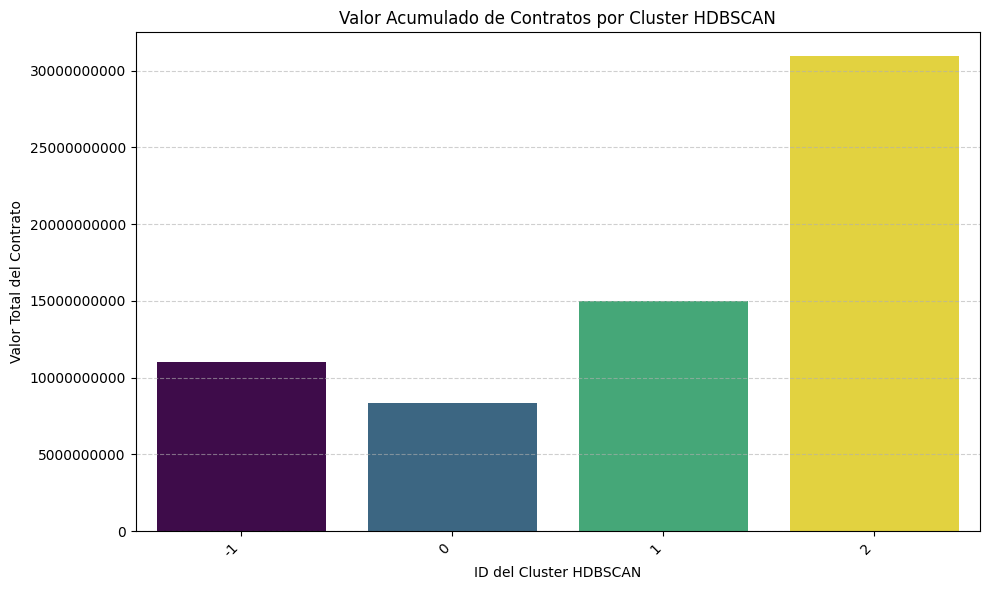


--- Generando gráfico de evolución anual del Valor Acumulado de Contratos por Cluster HDBSCAN ---


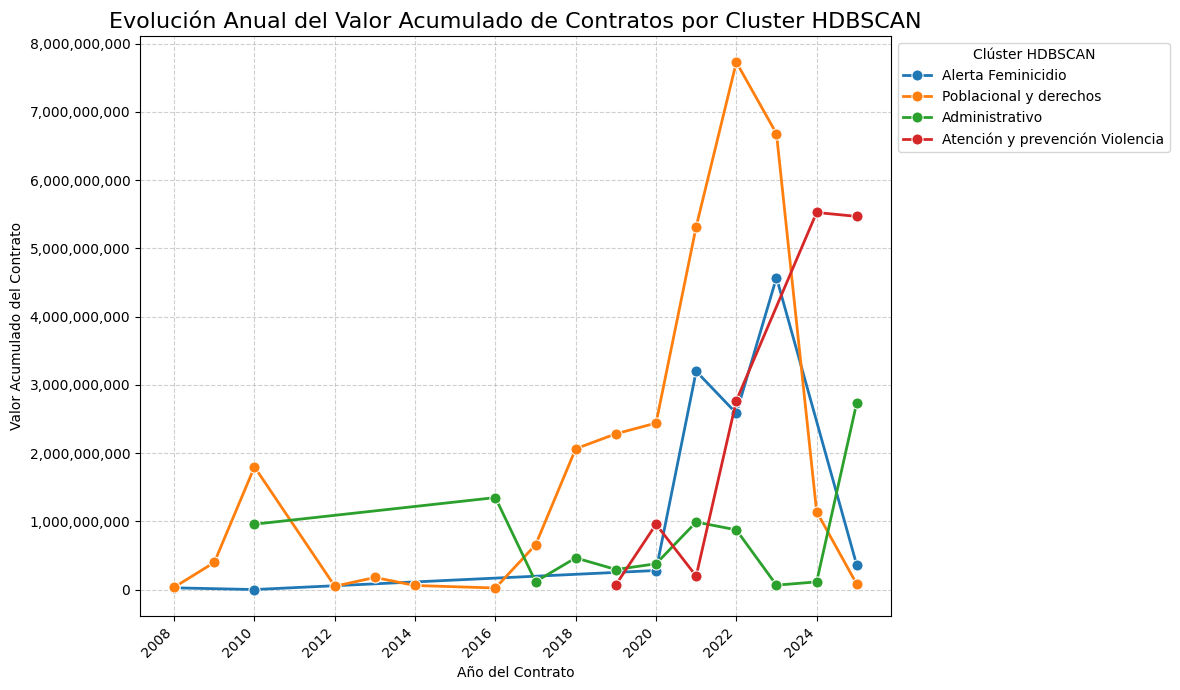

--- Generación de gráficos completada ---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mticker # Added for axis formatting

print("--- Generando gráfico de valor acumulado de contratos por Cluster HDBSCAN ---")

# Asegurarse de que cluster_total_values existe del análisis anterior
# Si el kernel se reinició, se podría recrear a partir de df
if 'cluster_total_values' not in globals() or cluster_total_values.empty:
    if 'df' in globals() and 'cluster_hdbscan' in df.columns:
        cluster_total_values = df.groupby('cluster_hdbscan')['valor_contrato'].sum().reset_index()
    else:
        print("  ⚠️ No se pudo generar el gráfico. Asegúrate de que los DataFrames 'df' y 'cluster_total_values' estén disponibles.")
        cluster_total_values = pd.DataFrame() # Asegurar que es un DataFrame vacío para evitar errores

if not cluster_total_values.empty:
    # Ordenar los clusters por su valor_contrato acumulado para una mejor visualización
    cluster_total_values_sorted = cluster_total_values.sort_values(by='valor_contrato', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='cluster_hdbscan', y='valor_contrato', data=cluster_total_values_sorted, palette='viridis', hue='cluster_hdbscan', legend=False)
    plt.title('Valor Acumulado de Contratos por Cluster HDBSCAN')
    plt.xlabel('ID del Cluster HDBSCAN')
    plt.ylabel('Valor Total del Contrato')
    plt.xticks(rotation=45, ha='right')
    plt.ticklabel_format(style='plain', axis='y') # Formato para evitar notación científica en el eje y
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("  No hay datos disponibles en 'cluster_total_values' para generar el gráfico.")

# --- Nueva función: Gráfico de acumulado de valor de contratos por año y por cluster ----
print("\n--- Generando gráfico de evolución anual del Valor Acumulado de Contratos por Cluster HDBSCAN ---")

if 'df' in globals() and 'cluster_hdbscan' in df.columns and 'Año_Contrato' in df.columns:
    # Agrupar por año y cluster, sumando el valor del contrato
    df_yearly_cluster_value = df.groupby(['Año_Contrato', 'cluster_hdbscan'])['valor_contrato'].sum().reset_index()

    # Define generic labels for the legend (up to 10, plus noise)
    cluster_legend_map = {
        -1: "Alerta Feminicidio", # Cluster -1 is often noise
        0: "Administrativo",
        1: "Atención y prevención Violencia",
        2: "Poblacional y derechos",
        3: "Grupo Temático 4",
        4: "Grupo Temático 5",
        5: "Grupo Temático 6",
        6: "Grupo Temático 7",
        7: "Grupo Temático 8",
        8: "Grupo Temático 9",
        9: "Grupo Temático 10"
    }

    # Map cluster IDs to generic labels for the legend
    # Use .fillna() to ensure any cluster IDs not in the map are still shown (e.g., as their number string)
    df_yearly_cluster_value['cluster_label'] = df_yearly_cluster_value['cluster_hdbscan'].map(cluster_legend_map).fillna(df_yearly_cluster_value['cluster_hdbscan'].astype(str))

    plt.figure(figsize=(14, 7))
    ax = sns.lineplot(
        x='Año_Contrato',
        y='valor_contrato',
        hue='cluster_label', # Use mapped labels for the legend
        data=df_yearly_cluster_value,
        marker='o',
        palette='tab10',
        linewidth=2,
        markersize=8,
        zorder=2 # Ensure lines are below zero-value markers
    )

    # Overlay scatter points for zero values (black dot)
    zero_value_points = df_yearly_cluster_value[df_yearly_cluster_value['valor_contrato'] == 0]
    if not zero_value_points.empty:
        # Plot zero values as black dots
        sns.scatterplot(
            x='Año_Contrato',
            y='valor_contrato',
            data=zero_value_points,
            color='black',
            marker='o',
            s=100, # Slightly larger for emphasis
            ax=ax,
            zorder=3 # Ensure black dots are on top of lines
        )

    plt.title('Evolución Anual del Valor Acumulado de Contratos por Cluster HDBSCAN', fontsize=16) # Increased title fontsize
    plt.xlabel('Año del Contrato')
    plt.ylabel('Valor Acumulado del Contrato')

    # Y-axis: Add punctuation (thousands separator)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    # X-axis: Ensure integer years (without decimals)
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='Clúster HDBSCAN', loc='upper left', bbox_to_anchor=(1,1)) # Generic legend title
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust tight_layout to make space for legend on the right
    plt.show()
else:
    print("  ⚠️ No se pudo generar el gráfico de evolución anual. Asegúrate de que los DataFrames 'df' y las columnas 'cluster_hdbscan' y 'Año_Contrato' estén disponibles.")

print("--- Generación de gráficos completada ---")